In [1]:
#pip install opencv-python

In [1]:
import os
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import random
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop, Adam

In [2]:
data = r'C:\Users\strydo-user01\Desktop\images'

In [3]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [4]:
images[:20]

['C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0001.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0002.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0003.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0004.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0005.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0006.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0007.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0008.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0009.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0010.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0011.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0012.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0013.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0014.jpg',
 'C:\\Users\\strydo-user01\\Desktop\\images\\Autistic\\0015.jpg',
 'C:\\User

In [5]:
len(images)

2897

In [6]:
class_values = []
for i in images:
    j = i.split('\\')
    class_values.append(j[-2])

In [7]:
class_values[:10]

['Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic']

In [8]:
len(class_values)

2897

In [9]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])

In [10]:
data

image_path   class_label
0     C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
1     C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
2     C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
3     C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
4     C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
...                                                 ...           ...
2892  C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
2893  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2894  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2895  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2896  C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic

[2897 rows x 2 columns]

In [11]:
data.class_label.value_counts()

Non_Autistic    1455
Autistic        1442
Name: class_label, dtype: int64

In [12]:
df_c0 = data[data['class_label'] =="Autistic"]
df_c1 = data[data['class_label'] =="Non_Autistic"]

In [13]:
df_unsampled=pd.concat([df_c0, df_c1])
df_unsampled

image_path   class_label
1     C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
2     C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
8     C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
10    C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
13    C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
...                                                 ...           ...
2887  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2888  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2893  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2894  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2895  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic

[2897 rows x 2 columns]

In [14]:
df_unsampled.head()

image_path class_label
1   C:\Users\strydo-user01\Desktop\images\Autistic...    Autistic
2   C:\Users\strydo-user01\Desktop\images\Autistic...    Autistic
8   C:\Users\strydo-user01\Desktop\images\Autistic...    Autistic
10  C:\Users\strydo-user01\Desktop\images\Autistic...    Autistic
13  C:\Users\strydo-user01\Desktop\images\Autistic...    Autistic

In [15]:
df_unsampled.tail()

image_path   class_label
2887  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2888  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2893  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2894  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2895  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic

In [16]:
df_unsampled.class_label.value_counts()

Non_Autistic    1455
Autistic        1442
Name: class_label, dtype: int64

In [17]:
df_unsampled.shape

(2897, 2)

In [18]:
data = df_unsampled.sample(frac=1)
data.shape

(2897, 2)

In [19]:
data[:10]

image_path   class_label
1679  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2001  C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
261   C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
506   C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
1412  C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
605   C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2040  C:\Users\strydo-user01\Desktop\images\Autistic...      Autistic
2296  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2880  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic
2859  C:\Users\strydo-user01\Desktop\images\Non_Auti...  Non_Autistic

Text(0.5, 0, 'Class_label')

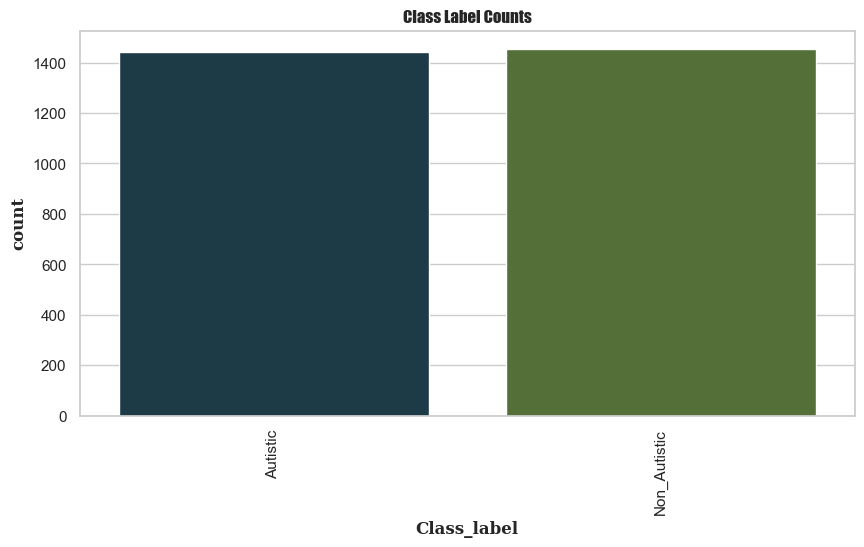

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [21]:
def resize_image(img):
    file = cv2.imread(img)
    resized = cv2.resize(file, (48,48), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,48,48,3])
    return resized

In [22]:
def resize_image(img):
    file = cv2.imread(img)
    print("START")
    print(file)
    print(img)
    print("END")
    resized = cv2.resize(file, (48,48), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,48,48,3])
    return resized

In [23]:
images=[resize_image(img) for img in data['image_path']]

START
[[[139 163 181]
  [139 163 181]
  [139 163 181]
  ...
  [ 84 112 146]
  [ 79 107 141]
  [ 72 100 134]]

 [[139 163 181]
  [139 163 181]
  [139 163 181]
  ...
  [ 91 122 155]
  [ 89 120 153]
  [ 88 119 152]]

 [[139 163 181]
  [139 163 181]
  [139 163 181]
  ...
  [ 88 123 156]
  [ 90 125 158]
  [ 92 127 160]]

 ...

 [[197 198 202]
  [202 203 207]
  [208 209 213]
  ...
  [234 235 239]
  [232 233 237]
  [234 235 239]]

 [[198 199 203]
  [202 203 207]
  [208 209 213]
  ...
  [232 233 237]
  [228 229 233]
  [228 229 233]]

 [[206 207 211]
  [208 209 213]
  [212 213 217]
  ...
  [231 232 236]
  [227 228 232]
  [226 227 231]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1121.jpg
END
START
[[[  5  22  25]
  [  5  22  25]
  [  5  22  25]
  ...
  [  1   4   2]
  [  1   4   2]
  [  1   4   2]]

 [[  5  22  25]
  [  5  22  25]
  [  5  22  25]
  ...
  [  1   4   2]
  [  1   4   2]
  [  1   4   2]]

 [[  5  22  25]
  [  5  22  25]
  [  5  22  25]
  ...
  [  1   4   2]
  [  1   4   2]


START
[[[ 74  69  71]
  [ 74  69  71]
  [ 74  69  71]
  ...
  [ 63  60  62]
  [ 65  62  64]
  [ 70  67  69]]

 [[ 74  69  71]
  [ 74  69  71]
  [ 74  69  71]
  ...
  [ 61  58  60]
  [ 64  61  63]
  [ 69  66  68]]

 [[ 73  68  70]
  [ 73  68  70]
  [ 73  68  70]
  ...
  [ 57  56  58]
  [ 60  59  61]
  [ 67  64  66]]

 ...

 [[206 205 209]
  [204 203 207]
  [204 202 208]
  ...
  [ 62  78 124]
  [ 59  76 119]
  [ 53  69 112]]

 [[207 203 208]
  [207 203 208]
  [204 203 207]
  ...
  [ 65  81 124]
  [ 65  81 124]
  [ 64  77 121]]

 [[205 201 206]
  [208 204 209]
  [208 207 211]
  ...
  [ 65  81 124]
  [ 67  83 126]
  [ 69  83 125]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0917.jpg
END
START
[[[174 171 166]
  [190 187 182]
  [228 227 223]
  ...
  [ 22  42  60]
  [ 22  42  60]
  [ 24  44  61]]

 [[188 185 180]
  [198 197 193]
  [198 197 193]
  ...
  [ 33  53  71]
  [ 28  48  65]
  [ 31  50  65]]

 [[157 156 152]
  [179 178 174]
  [188 189 187]
  ...
  [ 43  61  78]
  [ 34  52  69]


START
[[[ 66 118 154]
  [ 67 117 153]
  [ 68 118 154]
  ...
  [192 227 230]
  [192 227 230]
  [193 228 231]]

 [[ 70 120 156]
  [ 68 118 154]
  [ 69 117 153]
  ...
  [191 226 229]
  [191 226 229]
  [192 227 230]]

 [[ 71 121 157]
  [ 67 117 153]
  [ 68 116 152]
  ...
  [192 226 226]
  [193 227 227]
  [193 227 227]]

 ...

 [[ 37  49  67]
  [ 39  49  66]
  [ 43  50  65]
  ...
  [  9  13  14]
  [  8  12  13]
  [  7  11  12]]

 [[ 39  49  67]
  [ 41  49  66]
  [ 46  51  66]
  ...
  [ 14  17  21]
  [ 13  16  20]
  [ 12  15  19]]

 [[ 41  48  67]
  [ 42  49  66]
  [ 48  51  66]
  ...
  [ 16  19  23]
  [ 16  19  23]
  [ 15  18  22]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0861.jpg
END
START
[[[ 20  86 135]
  [ 17  83 132]
  [ 17  83 132]
  ...
  [ 75 111 129]
  [ 75 111 129]
  [ 75 111 129]]

 [[ 19  85 136]
  [ 16  82 133]
  [ 16  82 133]
  ...
  [ 74 110 128]
  [ 74 110 128]
  [ 74 110 128]]

 [[ 17  84 139]
  [ 14  82 135]
  [ 14  82 135]
  ...
  [ 73 109 127]
  [ 73 109 127]
  [ 

START
[[[  0  19  30]
  [  0  19  30]
  [  0  20  31]
  ...
  [ 65  80  89]
  [ 71  87  94]
  [ 79  96  99]]

 [[  2  20  31]
  [  2  20  31]
  [  4  20  32]
  ...
  [ 65  81  94]
  [ 70  86  98]
  [ 77  95 102]]

 [[  7  21  33]
  [  7  21  33]
  [  8  22  34]
  ...
  [ 63  79  96]
  [ 68  84 100]
  [ 73  90 103]]

 ...

 [[209 107   1]
  [207 108   0]
  [206 107   0]
  ...
  [143 157 176]
  [143 157 176]
  [143 157 176]]

 [[209 107   1]
  [207 108   0]
  [206 107   0]
  ...
  [142 156 175]
  [142 156 175]
  [142 156 175]]

 [[209 107   1]
  [207 108   0]
  [206 107   0]
  ...
  [141 155 174]
  [141 155 174]
  [141 155 174]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0418.jpg
END
START
[[[ 54  75  73]
  [ 55  76  74]
  [ 55  76  74]
  ...
  [ 45  71  71]
  [ 46  72  72]
  [ 47  73  73]]

 [[ 54  75  73]
  [ 55  76  74]
  [ 55  76  74]
  ...
  [ 47  71  71]
  [ 48  72  72]
  [ 48  72  72]]

 [[ 54  75  73]
  [ 55  76  74]
  [ 55  76  74]
  ...
  [ 47  71  71]
  [ 48  72  72]


START
[[[184 196 214]
  [184 196 214]
  [184 196 214]
  ...
  [ 27  37  44]
  [ 58  67  76]
  [136 145 154]]

 [[184 196 214]
  [184 196 214]
  [184 196 214]
  ...
  [ 26  36  43]
  [ 62  71  80]
  [143 152 161]]

 [[183 195 213]
  [183 195 213]
  [183 195 213]
  ...
  [ 25  35  42]
  [ 66  75  84]
  [151 160 169]]

 ...

 [[133 137 185]
  [131 135 183]
  [127 131 179]
  ...
  [ 47  21 188]
  [ 47  21 188]
  [ 47  21 188]]

 [[134 138 186]
  [131 135 183]
  [127 131 179]
  ...
  [ 47  21 188]
  [ 47  21 188]
  [ 47  21 188]]

 [[136 140 188]
  [134 138 187]
  [130 134 183]
  ...
  [ 47  21 188]
  [ 47  21 188]
  [ 47  21 188]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1096.jpg
END
START
[[[ 59  72  88]
  [ 59  72  88]
  [ 60  73  89]
  ...
  [ 89 111 146]
  [ 89 111 146]
  [ 90 112 147]]

 [[ 61  74  90]
  [ 62  75  91]
  [ 62  75  91]
  ...
  [ 89 111 146]
  [ 89 111 146]
  [ 91 113 148]]

 [[ 62  75  91]
  [ 62  75  91]
  [ 62  75  91]
  ...
  [ 89 111 146]
  [ 90 112 147]
  [ 

START
[[[ 31  20  23]
  [ 21  14  17]
  [ 20  15  17]
  ...
  [ 41 101  93]
  [ 66 145 131]
  [ 86 176 153]]

 [[ 27  16  19]
  [ 24  17  20]
  [ 24  19  21]
  ...
  [ 43 102  94]
  [ 68 145 131]
  [ 88 176 153]]

 [[ 25  14  17]
  [ 27  20  23]
  [ 29  24  26]
  ...
  [ 46 100  95]
  [ 71 143 130]
  [ 91 173 154]]

 ...

 [[ 19  19  31]
  [ 10  10  22]
  [  5   5  17]
  ...
  [201 193 203]
  [209 201 211]
  [214 206 216]]

 [[ 12  13  23]
  [  7   8  18]
  [  4   5  15]
  ...
  [197 193 205]
  [192 192 204]
  [193 197 208]]

 [[ 11  12  22]
  [  7   8  18]
  [  4   5  15]
  ...
  [197 193 205]
  [192 192 204]
  [193 197 208]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1324.jpg
END
START
[[[ 87 136 158]
  [ 94 141 163]
  [ 96 143 165]
  ...
  [ 96 142 166]
  [ 96 142 166]
  [ 95 143 167]]

 [[ 88 137 159]
  [ 94 141 163]
  [ 96 143 165]
  ...
  [ 98 142 166]
  [ 97 143 167]
  [ 97 143 167]]

 [[ 88 137 159]
  [ 94 141 163]
  [ 96 143 165]
  ...
  [ 99 143 167]
  [ 99 143 167]


START
[[[ 85  92  95]
  [ 85  92  95]
  [ 77  84  87]
  ...
  [ 28  33  36]
  [ 27  32  35]
  [ 32  37  40]]

 [[ 90  97 100]
  [ 86  93  96]
  [ 76  83  86]
  ...
  [ 30  35  38]
  [ 33  38  41]
  [ 38  43  46]]

 [[ 90  97 100]
  [ 81  88  91]
  [ 69  76  79]
  ...
  [ 32  37  40]
  [ 40  45  48]
  [ 45  50  53]]

 ...

 [[163 170 173]
  [170 177 180]
  [179 186 189]
  ...
  [172 177 180]
  [175 180 183]
  [175 180 183]]

 [[170 177 180]
  [168 175 178]
  [164 171 174]
  ...
  [176 181 184]
  [175 180 183]
  [175 180 183]]

 [[164 171 174]
  [160 167 170]
  [155 162 165]
  ...
  [180 185 188]
  [179 184 187]
  [179 184 187]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0570.jpg
END
START
[[[176 184 153]
  [167 176 143]
  [164 174 138]
  ...
  [255 224 159]
  [253 218 150]
  [255 219 149]]

 [[176 184 153]
  [176 185 152]
  [177 188 150]
  ...
  [254 222 157]
  [254 218 148]
  [254 216 144]]

 [[174 183 150]
  [184 194 158]
  [190 201 161]
  ...
  [255 221 155]
  [254 218 148]
  [2

START
[[[102 105 103]
  [100 105 104]
  [ 99 104 105]
  ...
  [ 93  89  78]
  [ 86  82  71]
  [ 80  76  65]]

 [[104 107 105]
  [104 109 108]
  [101 106 107]
  ...
  [ 93  89  78]
  [ 87  83  72]
  [ 80  76  65]]

 [[ 99 104 103]
  [104 110 109]
  [ 98 106 106]
  ...
  [ 94  90  79]
  [ 87  83  72]
  [ 81  77  66]]

 ...

 [[232 203 176]
  [224 195 168]
  [218 191 164]
  ...
  [224 195 168]
  [222 193 166]
  [219 190 163]]

 [[231 204 177]
  [224 197 170]
  [220 193 166]
  ...
  [225 196 169]
  [223 194 167]
  [219 190 163]]

 [[231 204 177]
  [225 198 171]
  [222 195 168]
  ...
  [226 197 170]
  [224 195 168]
  [220 191 164]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0885.jpg
END
START
[[[254 253 249]
  [254 253 249]
  [254 253 249]
  ...
  [249 248 244]
  [249 248 244]
  [249 248 244]]

 [[254 253 249]
  [254 253 249]
  [254 253 249]
  ...
  [249 248 244]
  [249 248 244]
  [249 248 244]]

 [[254 253 249]
  [254 253 249]
  [254 253 249]
  ...
  [249 248 244]
  [249 248 244]


START
[[[ 71  64  55]
  [ 91  83  76]
  [110 104  97]
  ...
  [242 244 252]
  [243 245 253]
  [242 244 252]]

 [[ 66  58  51]
  [ 77  69  62]
  [ 96  90  85]
  ...
  [239 241 249]
  [240 242 250]
  [240 242 250]]

 [[ 60  52  45]
  [ 64  58  53]
  [ 83  77  72]
  ...
  [235 238 246]
  [236 239 247]
  [236 239 247]]

 ...

 [[230 212 211]
  [230 212 211]
  [231 213 212]
  ...
  [189 197 210]
  [188 196 209]
  [186 195 208]]

 [[230 212 211]
  [230 212 211]
  [231 213 212]
  ...
  [190 199 212]
  [188 197 210]
  [183 195 207]]

 [[230 212 211]
  [230 212 211]
  [231 213 212]
  ...
  [189 200 214]
  [186 197 211]
  [181 194 208]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0933.jpg
END
START
[[[  0  67 130]
  [  7  76 139]
  [ 11  84 146]
  ...
  [113 141 176]
  [101 129 164]
  [ 88 116 151]]

 [[  0  66 129]
  [  7  76 139]
  [ 12  85 147]
  ...
  [103 131 165]
  [102 130 164]
  [103 131 165]]

 [[  0  65 128]
  [  5  76 139]
  [ 12  85 147]
  ...
  [108 135 169]
  [116 143 177]


START
[[[ 84  90  89]
  [104 110 109]
  [129 135 134]
  ...
  [ 56  77  98]
  [ 57  78  99]
  [ 58  79 100]]

 [[ 92  98  97]
  [108 114 113]
  [127 133 132]
  ...
  [ 54  75  96]
  [ 55  76  97]
  [ 56  77  98]]

 [[100 106 105]
  [111 117 116]
  [123 129 128]
  ...
  [ 56  78  96]
  [ 57  79  97]
  [ 58  80  98]]

 ...

 [[ 95  82  60]
  [ 97  84  62]
  [ 98  85  63]
  ...
  [ 29  34  33]
  [ 29  34  33]
  [ 29  34  33]]

 [[ 94  81  59]
  [ 95  82  60]
  [ 95  82  60]
  ...
  [ 28  33  32]
  [ 28  33  32]
  [ 28  33  32]]

 [[ 90  79  57]
  [ 91  80  58]
  [ 91  80  58]
  ...
  [ 29  34  33]
  [ 29  34  33]
  [ 29  34  33]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0272.jpg
END
START
[[[ 57  75  86]
  [ 62  82  93]
  [ 57  82  92]
  ...
  [142 167 171]
  [154 175 177]
  [158 178 179]]

 [[ 52  70  81]
  [ 60  80  91]
  [ 56  81  91]
  ...
  [142 167 171]
  [153 174 176]
  [158 178 179]]

 [[ 61  79  90]
  [ 66  86  97]
  [ 60  85  95]
  ...
  [139 164 168]
  [148 171 173]
  [1

START
[[[ 74  80  85]
  [ 69  75  80]
  [ 70  76  83]
  ...
  [ 56  73 106]
  [ 65  80 113]
  [ 71  86 119]]

 [[ 76  82  87]
  [ 75  81  86]
  [ 76  82  89]
  ...
  [ 58  75 108]
  [ 68  83 116]
  [ 74  89 122]]

 [[ 79  83  88]
  [ 84  88  93]
  [ 86  89  97]
  ...
  [ 65  84 119]
  [ 76  92 128]
  [ 83  99 135]]

 ...

 [[157 179 191]
  [159 178 191]
  [158 177 190]
  ...
  [ 34  29  31]
  [ 36  31  33]
  [ 37  32  34]]

 [[155 177 189]
  [157 176 191]
  [157 176 191]
  ...
  [ 31  26  27]
  [ 33  28  29]
  [ 36  31  32]]

 [[155 177 189]
  [157 176 191]
  [157 176 191]
  ...
  [ 31  26  27]
  [ 33  28  29]
  [ 36  31  32]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0967.jpg
END
START
[[[255 250 217]
  [255 250 217]
  [255 250 217]
  ...
  [253 238 206]
  [253 238 206]
  [253 238 206]]

 [[255 250 217]
  [255 250 217]
  [255 250 217]
  ...
  [253 238 206]
  [253 238 206]
  [253 238 206]]

 [[255 249 216]
  [255 249 216]
  [255 249 216]
  ...
  [253 238 206]
  [253 238 206]


START
[[[106 105  91]
  [106 105  91]
  [106 105  91]
  ...
  [ 58  61  52]
  [ 58  61  52]
  [ 57  60  51]]

 [[106 105  91]
  [106 105  91]
  [106 105  91]
  ...
  [ 56  59  50]
  [ 57  60  51]
  [ 57  60  51]]

 [[106 105  91]
  [106 105  91]
  [106 105  91]
  ...
  [ 54  57  48]
  [ 56  59  50]
  [ 58  61  52]]

 ...

 [[ 61  72  80]
  [ 63  74  82]
  [ 62  74  80]
  ...
  [238 216 241]
  [245 223 247]
  [249 229 248]]

 [[ 64  75  83]
  [ 66  77  85]
  [ 65  76  84]
  ...
  [237 215 240]
  [244 222 246]
  [249 229 248]]

 [[ 68  78  88]
  [ 70  80  90]
  [ 68  79  87]
  ...
  [237 215 240]
  [243 221 245]
  [248 228 247]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0811.jpg
END
START
[[[115 131 147]
  [122 138 154]
  [121 139 156]
  ...
  [ 74  77  91]
  [ 67  70  84]
  [ 66  68  79]]

 [[113 129 145]
  [118 134 150]
  [117 135 152]
  ...
  [ 67  70  84]
  [ 59  62  76]
  [ 58  60  71]]

 [[110 128 145]
  [114 132 149]
  [115 133 150]
  ...
  [ 65  68  82]
  [ 66  69  83]
  [ 

START
[[[144 170 187]
  [145 171 188]
  [148 174 191]
  ...
  [244 241 236]
  [250 247 242]
  [251 248 243]]

 [[140 166 183]
  [142 168 185]
  [144 170 187]
  ...
  [242 239 234]
  [248 245 240]
  [248 245 240]]

 [[131 158 178]
  [133 160 180]
  [135 162 182]
  ...
  [239 239 233]
  [244 244 238]
  [244 244 238]]

 ...

 [[ 11   1   1]
  [ 12   3   0]
  [ 13   4   1]
  ...
  [ 92  44   2]
  [107  51   2]
  [117  55   1]]

 [[ 11   1   1]
  [ 12   3   0]
  [ 13   4   1]
  ...
  [ 91  43   1]
  [104  51   1]
  [114  54   0]]

 [[ 11   1   1]
  [ 12   3   0]
  [ 13   4   1]
  ...
  [ 90  42   0]
  [103  50   0]
  [113  53   0]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0231.jpg
END
START
[[[134 130 172]
  [131 127 168]
  [130 127 166]
  ...
  [244 229 226]
  [238 223 220]
  [234 219 216]]

 [[127 125 167]
  [122 121 161]
  [118 117 156]
  ...
  [214 197 194]
  [196 179 176]
  [186 169 166]]

 [[126 128 169]
  [118 120 160]
  [111 114 152]
  ...
  [176 158 157]
  [162 144 143]
  [1

START
[[[ 32 104  61]
  [ 52 110  85]
  [ 83 124 119]
  ...
  [ 35  83  41]
  [ 32  80  38]
  [ 31  79  37]]

 [[ 39 109  68]
  [ 55 113  89]
  [ 87 127 122]
  ...
  [ 32  80  38]
  [ 30  78  36]
  [ 30  78  36]]

 [[ 55 120  81]
  [ 66 119  99]
  [ 96 133 131]
  ...
  [ 30  80  38]
  [ 29  79  37]
  [ 29  79  37]]

 ...

 [[ 82  48   2]
  [ 82  49   0]
  [ 86  51   1]
  ...
  [145  79   0]
  [145  79   0]
  [145  79   0]]

 [[ 81  47   1]
  [ 82  49   0]
  [ 85  50   0]
  ...
  [145  79   0]
  [145  79   0]
  [145  79   0]]

 [[ 81  47   1]
  [ 82  49   0]
  [ 85  50   0]
  ...
  [145  79   0]
  [145  79   0]
  [145  79   0]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0462.jpg
END
START
[[[22 26 27]
  [24 28 29]
  [26 30 31]
  ...
  [35 39 40]
  [35 39 40]
  [36 40 41]]

 [[23 27 28]
  [24 28 29]
  [27 31 32]
  ...
  [35 39 40]
  [35 39 40]
  [36 40 41]]

 [[24 28 29]
  [25 29 30]
  [26 30 31]
  ...
  [35 39 40]
  [36 40 41]
  [36 40 41]]

 ...

 [[34 38 39]
  [35 39 40]
  [36 40

START
[[[ 62  60  66]
  [ 42  39  48]
  [ 20  16  28]
  ...
  [115 149 112]
  [122 164 123]
  [126 170 129]]

 [[ 35  33  39]
  [ 19  16  25]
  [  5   1  13]
  ...
  [116 151 111]
  [121 161 120]
  [121 165 124]]

 [[ 16  14  20]
  [  6   3  12]
  [  1   0   9]
  ...
  [119 154 114]
  [117 157 116]
  [114 158 117]]

 ...

 [[ 90 175 123]
  [ 90 175 123]
  [ 89 174 122]
  ...
  [114 127 101]
  [102 118  94]
  [ 92 111  86]]

 [[ 89 174 122]
  [ 89 174 122]
  [ 90 175 123]
  ...
  [151 162 129]
  [115 131 100]
  [107 127  98]]

 [[ 89 175 121]
  [ 89 175 121]
  [ 90 176 122]
  ...
  [233 241 204]
  [210 224 188]
  [143 162 129]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0758.jpg
END
START
[[[ 82  79  74]
  [ 81  78  73]
  [ 80  77  72]
  ...
  [ 16  18  18]
  [ 15  17  17]
  [ 15  17  17]]

 [[ 93  90  85]
  [ 92  89  84]
  [ 91  88  83]
  ...
  [ 14  16  16]
  [ 14  16  16]
  [ 14  16  16]]

 [[101  97  92]
  [101  97  92]
  [100  96  91]
  ...
  [ 13  15  15]
  [ 13  15  15]


START
[[[255 252 237]
  [243 242 228]
  [252 255 245]
  ...
  [249 247 229]
  [249 247 229]
  [250 248 230]]

 [[226 225 215]
  [224 225 216]
  [216 223 216]
  ...
  [248 247 227]
  [249 248 228]
  [249 248 228]]

 [[146 152 151]
  [153 161 160]
  [144 155 153]
  ...
  [249 251 229]
  [249 251 229]
  [250 252 230]]

 ...

 [[ 75  49   0]
  [ 74  49   0]
  [ 68  44   2]
  ...
  [255 237  71]
  [255 244  85]
  [255 235  80]]

 [[ 78  50   0]
  [ 74  49   0]
  [ 68  44   2]
  ...
  [222 166   7]
  [255 237  82]
  [255 250  90]]

 [[ 81  50   0]
  [ 77  50   0]
  [ 65  43   1]
  ...
  [220 158   0]
  [229 181  23]
  [255 245  82]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0755.jpg
END
START
[[[196 200 201]
  [195 199 200]
  [196 200 201]
  ...
  [185 193 200]
  [185 193 200]
  [184 192 199]]

 [[196 200 201]
  [195 199 200]
  [196 200 201]
  ...
  [185 193 200]
  [185 193 200]
  [185 193 200]]

 [[196 200 201]
  [195 199 200]
  [196 200 201]
  ...
  [186 194 201]
  [186 194 201]


START
[[[173 175 176]
  [172 176 177]
  [167 171 172]
  ...
  [142 161 198]
  [143 161 198]
  [143 161 198]]

 [[172 174 175]
  [170 174 175]
  [163 168 169]
  ...
  [142 161 198]
  [142 160 197]
  [143 161 198]]

 [[170 173 177]
  [169 172 176]
  [160 165 168]
  ...
  [142 159 198]
  [143 161 198]
  [143 161 198]]

 ...

 [[214 212 211]
  [212 211 207]
  [210 208 207]
  ...
  [222 218 213]
  [222 218 213]
  [222 218 213]]

 [[213 211 211]
  [210 208 207]
  [209 207 207]
  ...
  [222 218 213]
  [222 218 213]
  [222 218 213]]

 [[214 212 212]
  [211 209 209]
  [210 208 208]
  ...
  [222 218 213]
  [222 218 213]
  [222 218 213]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1261.jpg
END
START
[[[232 232 248]
  [232 232 248]
  [232 232 248]
  ...
  [140 141 231]
  [127 128 218]
  [120 121 211]]

 [[232 232 248]
  [232 232 248]
  [232 232 248]
  ...
  [134 136 224]
  [125 127 215]
  [125 127 215]]

 [[232 232 248]
  [232 232 248]
  [232 232 248]
  ...
  [137 139 223]
  [134 136 220]


START
[[[ 77 104 130]
  [ 77 102 128]
  [ 72  97 123]
  ...
  [ 20  28  41]
  [ 25  33  46]
  [ 26  33  48]]

 [[ 75 100 126]
  [ 73  98 124]
  [ 71  94 120]
  ...
  [ 26  34  47]
  [ 27  34  49]
  [ 24  31  46]]

 [[ 71  96 122]
  [ 69  94 120]
  [ 67  90 116]
  ...
  [ 29  37  50]
  [ 30  37  52]
  [ 27  34  49]]

 ...

 [[139 144 147]
  [140 145 148]
  [141 145 150]
  ...
  [ 82  96 114]
  [ 82  96 114]
  [ 82  96 114]]

 [[139 144 147]
  [140 145 148]
  [142 146 151]
  ...
  [ 80  94 112]
  [ 80  94 112]
  [ 80  94 112]]

 [[141 146 149]
  [142 147 150]
  [143 147 152]
  ...
  [ 78  92 110]
  [ 78  92 110]
  [ 79  93 111]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1465.jpg
END
START
[[[246 251 249]
  [253 255 254]
  [253 255 255]
  ...
  [115 154 199]
  [136 177 222]
  [160 205 249]]

 [[252 255 253]
  [255 255 254]
  [255 255 255]
  ...
  [ 96 142 190]
  [106 154 202]
  [121 170 218]]

 [[255 255 255]
  [255 255 255]
  [255 253 255]
  ...
  [103 157 210]
  [100 157 209]


START
[[[  6  19   0]
  [ 15  24   3]
  [ 22  26   7]
  ...
  [142 113  92]
  [148 111  85]
  [144 104  75]]

 [[  9  20   0]
  [ 19  25   6]
  [ 24  26   7]
  ...
  [130 110  93]
  [135 108  87]
  [134 104  79]]

 [[ 16  25   5]
  [ 24  28   9]
  [ 29  26  11]
  ...
  [112 106  95]
  [117 109  92]
  [116 107  87]]

 ...

 [[ 33  45  85]
  [ 35  44  94]
  [ 34  47  91]
  ...
  [135 115  67]
  [135 115  90]
  [135 116 109]]

 [[ 32  43  93]
  [ 34  43 100]
  [ 33  48  94]
  ...
  [134 117  68]
  [132 117  84]
  [132 118  95]]

 [[ 33  44 102]
  [ 35  44 107]
  [ 36  52  99]
  ...
  [137 121  74]
  [131 121  73]
  [124 119  70]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0179.jpg
END
START
[[[ 35  58  36]
  [ 41  60  41]
  [ 64  77  63]
  ...
  [118 123 126]
  [118 123 126]
  [118 121 129]]

 [[ 53  68  47]
  [ 78  92  74]
  [ 70  85  71]
  ...
  [118 123 126]
  [118 123 126]
  [118 121 129]]

 [[ 88  90  71]
  [126 133 118]
  [ 86 101  87]
  ...
  [117 122 125]
  [117 122 125]


START
[[[  0   3   1]
  [  0   3   1]
  [  0   3   1]
  ...
  [  3   9  22]
  [  0   6  15]
  [  0   6  15]]

 [[  0   3   1]
  [  0   3   1]
  [  0   3   1]
  ...
  [  1   9  22]
  [  0   8  17]
  [  0   8  17]]

 [[  0   3   1]
  [  0   3   1]
  [  0   3   1]
  ...
  [  2  10  23]
  [  0   9  18]
  [  0   9  18]]

 ...

 [[  0   2   3]
  [  0   2   3]
  [  0   2   3]
  ...
  [ 72  56  39]
  [ 46  37  24]
  [ 76  67  54]]

 [[  0   2   3]
  [  0   2   3]
  [  0   2   3]
  ...
  [ 68  78  55]
  [ 33  16   3]
  [127 108  93]]

 [[  1   2   0]
  [  1   2   0]
  [  1   2   0]
  ...
  [  7  28  26]
  [ 38  34  33]
  [153 146 119]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1507.jpg
END
START
[[[203 215 227]
  [161 176 185]
  [142 161 168]
  ...
  [240 246 245]
  [240 246 245]
  [240 246 245]]

 [[191 203 213]
  [160 175 184]
  [149 168 176]
  ...
  [241 247 246]
  [241 247 246]
  [241 247 246]]

 [[176 186 196]
  [157 172 181]
  [156 173 182]
  ...
  [242 248 247]
  [242 248 247]


START
[[[117  97  50]
  [112  93  50]
  [106  87  52]
  ...
  [ 59  15  32]
  [ 43   0  11]
  [ 51  10  17]]

 [[116  98  51]
  [110  93  50]
  [103  85  48]
  ...
  [ 61  21  33]
  [ 50   9  16]
  [ 58  19  21]]

 [[120 103  54]
  [112  96  50]
  [101  85  48]
  ...
  [ 61  24  34]
  [ 58  19  21]
  [ 67  29  27]]

 ...

 [[ 42  46  57]
  [ 38  42  53]
  [ 31  36  45]
  ...
  [106 113 110]
  [106 113 110]
  [102 109 104]]

 [[ 42  54  56]
  [ 40  49  53]
  [ 38  44  51]
  ...
  [ 95 102  99]
  [102 109 106]
  [102 109 106]]

 [[ 44  56  58]
  [ 42  51  55]
  [ 39  45  52]
  ...
  [100 107 104]
  [104 111 108]
  [103 110 107]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1436.jpg
END
START
[[[242 236 225]
  [242 236 225]
  [242 236 225]
  ...
  [ 94 101 134]
  [ 83  94 122]
  [ 83  94 122]]

 [[242 236 225]
  [242 236 225]
  [242 236 225]
  ...
  [ 94 101 134]
  [ 83  94 122]
  [ 83  94 122]]

 [[242 236 225]
  [242 236 225]
  [242 236 225]
  ...
  [ 93 101 131]
  [ 84  95 123]


START
[[[216 227 231]
  [215 226 230]
  [213 226 228]
  ...
  [182 195 181]
  [182 195 181]
  [183 196 182]]

 [[216 227 231]
  [215 226 230]
  [213 226 228]
  ...
  [182 195 181]
  [182 195 181]
  [183 196 182]]

 [[216 227 231]
  [215 226 230]
  [213 226 228]
  ...
  [182 195 181]
  [182 195 181]
  [183 196 182]]

 ...

 [[216 226 214]
  [215 225 213]
  [214 224 211]
  ...
  [246 241 216]
  [246 241 216]
  [245 240 215]]

 [[217 227 214]
  [215 225 212]
  [214 224 211]
  ...
  [244 240 215]
  [244 240 215]
  [244 240 215]]

 [[217 227 214]
  [215 225 212]
  [213 224 208]
  ...
  [245 241 216]
  [244 240 215]
  [244 240 215]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0279.jpg
END
START
[[[228 181  60]
  [151 115   8]
  [255 252 174]
  ...
  [251 252 213]
  [251 252 213]
  [251 252 213]]

 [[200 151  41]
  [210 173  81]
  [255 252 186]
  ...
  [251 252 213]
  [251 252 213]
  [251 252 213]]

 [[209 162  64]
  [254 221 142]
  [211 198 152]
  ...
  [251 252 213]
  [251 252 213]
  [2

START
[[[163 164 178]
  [161 162 176]
  [159 160 174]
  ...
  [155 162 182]
  [159 166 186]
  [158 165 185]]

 [[165 165 179]
  [162 162 176]
  [158 158 172]
  ...
  [151 158 178]
  [155 162 182]
  [154 161 181]]

 [[169 166 181]
  [164 161 176]
  [157 154 169]
  ...
  [143 150 170]
  [146 153 173]
  [146 153 173]]

 ...

 [[250 249 253]
  [250 249 253]
  [248 247 251]
  ...
  [136 177 120]
  [136 177 120]
  [130 180 122]]

 [[243 239 250]
  [241 237 248]
  [240 236 247]
  ...
  [145 194 140]
  [146 196 142]
  [148 199 142]]

 [[243 239 250]
  [241 237 248]
  [240 236 247]
  ...
  [146 196 142]
  [146 198 144]
  [146 199 142]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1505.jpg
END
START
[[[ 83  88  89]
  [ 80  85  88]
  [ 73  75  83]
  ...
  [ 22  26  27]
  [ 22  26  27]
  [ 32  36  37]]

 [[ 78  83  84]
  [ 72  77  80]
  [ 63  66  71]
  ...
  [ 41  45  46]
  [ 39  43  44]
  [ 42  46  47]]

 [[ 80  85  86]
  [ 71  76  79]
  [ 60  63  68]
  ...
  [ 28  33  34]
  [ 45  50  51]


START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 27   9   8]
  [ 23   8   6]
  [ 19   7   5]
  ...
  [ 79  40  26]
  [ 82  43  29]
  [ 84  45  31]]

 [[ 25   7   6]
  [ 22   7   5]
  [ 18   6   4]
  ...
  [ 79  40  26]
  [ 82  43  29]
  [ 84  45  31]]

 [[ 22   4   3]
  [ 20   5   3]
  [ 18   6   4]
  ...
  [ 79  40  26]
  [ 82  43  29]
  [ 84  45  31]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1300.jpg
END
START
[[[ 90  94  88]
  [ 84  78  71]
  [209 193 181]
  ...
  [ 71  79  62]
  [ 61  71  54]
  [ 51  65  47]]

 [[ 79  79  73]
  [ 90  81  72]
  [212 193 180]
  ...
  [ 72  80  63]
  [ 67  77  60]
  [ 61  75  57]]

 [[ 66  61  52]
  [106  91  82]
  [213 187 173]
  ...
  [ 70  76  59]
  [ 67  77  60]
  [ 

START
[[[ 16  21  19]
  [ 18  23  21]
  [ 16  21  19]
  ...
  [ 16  31  47]
  [ 14  29  45]
  [ 16  31  47]]

 [[ 18  23  21]
  [ 16  21  19]
  [  6  11   9]
  ...
  [  2  17  33]
  [  5  20  36]
  [ 16  31  47]]

 [[ 20  25  23]
  [ 17  22  20]
  [  3   8   6]
  ...
  [  7  24  37]
  [  8  25  38]
  [ 19  36  49]]

 ...

 [[157 169 173]
  [221 233 237]
  [204 215 219]
  ...
  [ 49  96 158]
  [ 50  97 159]
  [ 52  99 161]]

 [[153 165 169]
  [216 228 232]
  [214 226 228]
  ...
  [ 48  95 157]
  [ 50  97 159]
  [ 52  99 161]]

 [[143 158 160]
  [186 201 203]
  [188 201 203]
  ...
  [ 48  95 157]
  [ 50  97 159]
  [ 51  98 160]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1081.jpg
END
START
[[[ 33  41  41]
  [ 29  37  37]
  [ 24  32  32]
  ...
  [ 74 131 146]
  [ 74 131 146]
  [ 74 131 146]]

 [[ 34  42  42]
  [ 31  39  39]
  [ 26  34  34]
  ...
  [ 81 136 149]
  [ 81 136 149]
  [ 81 136 149]]

 [[ 33  43  43]
  [ 30  40  40]
  [ 26  36  36]
  ...
  [ 93 145 157]
  [ 93 145 157]


START
[[[ 15  19  77]
  [ 26  30  89]
  [ 22  26  85]
  ...
  [  8   8   8]
  [  6   6   6]
  [  2   2   2]]

 [[ 18  22  81]
  [ 19  22  83]
  [ 21  24  85]
  ...
  [  7   7   7]
  [  5   5   5]
  [  2   2   2]]

 [[ 20  22  86]
  [ 11  13  77]
  [ 21  23  87]
  ...
  [  7   7   7]
  [  6   6   6]
  [  4   4   4]]

 ...

 [[ 66 106 165]
  [ 68 108 167]
  [ 70 110 169]
  ...
  [173 182 156]
  [176 185 159]
  [179 188 162]]

 [[ 65 105 164]
  [ 68 108 167]
  [ 69 109 167]
  ...
  [177 183 152]
  [179 185 154]
  [182 188 157]]

 [[ 72 109 169]
  [ 73 111 169]
  [ 71 109 167]
  ...
  [179 184 152]
  [180 185 153]
  [180 185 153]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0837.jpg
END
START
[[[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[252 252 252]
  [253 253 253]
  [254 254 254]
  ...
  [255 255 255]
  [253 253 253]
  [252 252 252]]

 [[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [255 255 255]
  [254 254 254]


START
[[[ 55 177 167]
  [ 49 171 161]
  [ 49 169 158]
  ...
  [ 19  10  23]
  [ 18   9  22]
  [ 16   7  20]]

 [[ 52 171 162]
  [ 51 170 161]
  [ 45 163 152]
  ...
  [ 19  10  23]
  [ 19  10  23]
  [ 17   8  21]]

 [[ 51 168 159]
  [ 48 165 156]
  [ 48 163 154]
  ...
  [ 20  10  26]
  [ 20  10  26]
  [ 19   9  25]]

 ...

 [[255 140  46]
  [238 118  29]
  [209  83   1]
  ...
  [ 71 179 160]
  [ 60 182 164]
  [ 49 179 162]]

 [[245 124  38]
  [226 104  21]
  [203  74   1]
  ...
  [ 82 184 166]
  [ 64 182 164]
  [ 54 180 161]]

 [[230 108  24]
  [211  86   6]
  [194  64   0]
  ...
  [ 84 184 166]
  [ 61 177 158]
  [ 50 175 156]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1009.jpg
END
START
[[[ 52  60  60]
  [ 45  53  53]
  [ 37  45  45]
  ...
  [ 45  57  67]
  [ 42  54  66]
  [ 42  54  66]]

 [[ 50  58  58]
  [ 46  54  54]
  [ 42  47  48]
  ...
  [ 44  56  68]
  [ 40  54  66]
  [ 40  54  66]]

 [[ 47  55  55]
  [ 49  54  55]
  [ 45  50  51]
  ...
  [ 43  55  67]
  [ 40  54  66]


START
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 224 214]
  [199 224 214]
  [199 224 214]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [197 224 214]
  [199 224 214]
  [199 224 214]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [198 225 215]
  [198 223 213]
  [198 223 213]]

 ...

 [[243 252 249]
  [243 252 249]
  [243 252 249]
  ...
  [ 91 114 106]
  [ 87 110 102]
  [ 88 111 103]]

 [[243 252 249]
  [243 252 249]
  [243 252 249]
  ...
  [ 91 114 106]
  [ 91 114 106]
  [ 91 114 106]]

 [[243 252 249]
  [243 252 249]
  [243 252 249]
  ...
  [ 91 114 106]
  [ 92 115 107]
  [ 92 115 107]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1289.jpg
END
START
[[[199 177 152]
  [199 177 152]
  [199 177 152]
  ...
  [199 178 151]
  [198 177 150]
  [198 177 150]]

 [[199 177 152]
  [199 177 152]
  [199 177 152]
  ...
  [199 178 151]
  [198 177 150]
  [198 177 150]]

 [[199 177 152]
  [199 177 152]
  [199 177 152]
  ...
  [199 178 151]
  [198 177 150]


START
[[[217 230 222]
  [221 234 226]
  [227 240 232]
  ...
  [150 163 171]
  [153 168 177]
  [152 168 180]]

 [[218 231 223]
  [220 233 225]
  [224 237 229]
  ...
  [156 167 175]
  [159 171 181]
  [150 166 178]]

 [[218 231 223]
  [219 232 224]
  [222 235 227]
  ...
  [162 172 179]
  [165 176 184]
  [155 169 181]]

 ...

 [[219 232 240]
  [219 232 240]
  [219 232 240]
  ...
  [ 41  60  45]
  [ 41  60  45]
  [ 41  59  46]]

 [[219 232 240]
  [219 232 240]
  [219 232 240]
  ...
  [ 41  60  45]
  [ 41  60  45]
  [ 40  58  45]]

 [[219 232 240]
  [219 232 240]
  [219 232 240]
  ...
  [ 41  60  45]
  [ 41  60  45]
  [ 39  57  44]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0578.jpg
END
START
[[[255 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 247]
  [255 255 247]
  [255 255 247]]

 [[255 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 247]
  [255 255 247]
  [255 255 247]]

 [[255 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 247]
  [255 255 247]


START
[[[116 128 134]
  [108 120 126]
  [104 116 122]
  ...
  [255 194 143]
  [255 193 142]
  [255 194 143]]

 [[116 127 135]
  [106 118 124]
  [101 113 119]
  ...
  [255 194 143]
  [255 193 142]
  [255 194 143]]

 [[113 124 132]
  [103 114 122]
  [ 97 109 115]
  ...
  [255 195 141]
  [255 194 140]
  [255 195 141]]

 ...

 [[125 213 243]
  [124 212 242]
  [132 218 248]
  ...
  [ 61  87 117]
  [ 47  75 109]
  [ 39  67 101]]

 [[156 237 252]
  [127 206 239]
  [118 193 249]
  ...
  [139 143 148]
  [154 160 165]
  [ 98 111 109]]

 [[161 240 255]
  [131 207 249]
  [104 175 243]
  ...
  [247 250 254]
  [244 247 251]
  [142 153 150]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0813.jpg
END
START
[[[182 224 243]
  [180 229 243]
  [153 234 241]
  ...
  [ 52 112 102]
  [ 60 133 117]
  [ 58 138 125]]

 [[154 238 243]
  [146 227 230]
  [131 228 226]
  ...
  [ 57 110 113]
  [ 56 121 112]
  [ 57 124 109]]

 [[163 237 239]
  [149 214 215]
  [140 217 214]
  ...
  [ 51 101 119]
  [ 47 103 104]
  [ 

START
[[[32 38 45]
  [32 38 45]
  [32 38 45]
  ...
  [34 41 58]
  [32 39 56]
  [31 38 55]]

 [[32 38 45]
  [32 38 45]
  [32 38 45]
  ...
  [34 41 58]
  [32 39 56]
  [31 38 55]]

 [[32 38 45]
  [32 38 45]
  [33 39 46]
  ...
  [33 40 57]
  [32 39 56]
  [31 38 55]]

 ...

 [[57 26 25]
  [58 27 26]
  [59 28 27]
  ...
  [39 18 16]
  [38 17 15]
  [38 17 15]]

 [[57 26 25]
  [58 27 26]
  [59 28 27]
  ...
  [38 17 15]
  [38 17 15]
  [38 17 15]]

 [[60 26 26]
  [60 26 26]
  [60 26 26]
  ...
  [42 19 17]
  [42 19 17]
  [43 20 18]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1215.jpg
END
START
[[[213 218 221]
  [212 217 220]
  [211 216 219]
  ...
  [171 178 181]
  [171 178 181]
  [171 178 181]]

 [[212 217 220]
  [212 217 220]
  [210 215 218]
  ...
  [171 178 181]
  [172 179 182]
  [172 179 182]]

 [[211 216 219]
  [210 215 218]
  [209 214 217]
  ...
  [173 180 183]
  [176 183 186]
  [176 183 186]]

 ...

 [[ 82  89  92]
  [ 78  85  88]
  [ 76  83  86]
  ...
  [167 174 177]
  [166 173 176

START
[[[ 45  43  55]
  [ 11   1  17]
  [ 14   2  22]
  ...
  [232 244 254]
  [193 202 216]
  [110 119 133]]

 [[ 44  43  53]
  [ 31  22  35]
  [ 37  23  41]
  ...
  [130 142 152]
  [156 165 179]
  [123 132 146]]

 [[ 50  46  57]
  [ 32  22  35]
  [ 74  58  75]
  ...
  [216 228 238]
  [194 203 217]
  [194 203 217]]

 ...

 [[150 153 138]
  [148 151 136]
  [150 153 138]
  ...
  [209 211 205]
  [208 213 204]
  [208 213 204]]

 [[164 162 151]
  [160 158 147]
  [155 155 143]
  ...
  [206 210 204]
  [208 213 204]
  [208 213 204]]

 [[163 161 150]
  [159 157 146]
  [155 155 143]
  ...
  [207 211 205]
  [208 213 204]
  [208 213 204]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1163.jpg
END
START
[[[252 252 252]
  [255 255 255]
  [253 253 253]
  ...
  [165 169 170]
  [165 170 169]
  [165 170 169]]

 [[252 252 252]
  [255 255 255]
  [253 253 253]
  ...
  [165 169 170]
  [165 170 169]
  [165 170 169]]

 [[252 252 252]
  [255 255 255]
  [253 253 253]
  ...
  [165 169 170]
  [165 170 169]


START
[[[ 13  34  19]
  [ 14  35  20]
  [ 14  35  20]
  ...
  [118 202 177]
  [113 200 174]
  [107 199 170]]

 [[ 14  35  20]
  [ 14  35  20]
  [ 14  35  20]
  ...
  [120 204 179]
  [115 202 174]
  [108 200 171]]

 [[ 14  35  20]
  [ 14  35  20]
  [ 14  35  20]
  ...
  [122 207 179]
  [117 204 176]
  [110 202 173]]

 ...

 [[ 22  53  14]
  [ 22  53  14]
  [ 22  53  16]
  ...
  [153  78   2]
  [153  78   2]
  [153  79   1]]

 [[ 22  53  14]
  [ 22  53  14]
  [ 22  53  16]
  ...
  [153  78   2]
  [153  78   2]
  [153  79   1]]

 [[ 22  53  14]
  [ 22  53  14]
  [ 22  53  16]
  ...
  [153  78   2]
  [153  78   2]
  [153  79   1]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0632.jpg
END
START
[[[219 232 248]
  [215 223 252]
  [189 187 246]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[222 231 245]
  [230 234 255]
  [213 210 255]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[229 230 244]
  [238 237 255]
  [230 226 255]
  ...
  [240 240 240]
  [240 240 240]


START
[[[ 27  29  30]
  [ 27  29  30]
  [ 27  29  30]
  ...
  [ 22  24  34]
  [  5  12  27]
  [  0   4  21]]

 [[ 27  29  30]
  [ 27  29  30]
  [ 27  29  30]
  ...
  [ 20  22  32]
  [  4  12  25]
  [  0   5  22]]

 [[ 27  29  30]
  [ 27  29  30]
  [ 27  29  30]
  ...
  [ 19  21  31]
  [  9  15  28]
  [  3  10  25]]

 ...

 [[  8   7   9]
  [  8   7   9]
  [  8   7   9]
  ...
  [196 219 221]
  [196 219 221]
  [196 219 221]]

 [[  8   7   9]
  [  8   7   9]
  [  8   7   9]
  ...
  [196 220 220]
  [196 220 220]
  [197 221 221]]

 [[  8   7   9]
  [  8   7   9]
  [  8   7   9]
  ...
  [197 221 221]
  [197 221 221]
  [197 221 221]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0218.jpg
END
START
[[[216 217 215]
  [216 217 215]
  [216 217 215]
  ...
  [245 243 243]
  [243 241 241]
  [244 242 242]]

 [[216 217 215]
  [216 217 215]
  [216 217 215]
  ...
  [242 240 240]
  [240 238 238]
  [240 238 238]]

 [[217 218 216]
  [216 217 215]
  [216 217 215]
  ...
  [241 239 239]
  [239 237 237]


START
[[[201 227 204]
  [202 227 207]
  [205 226 211]
  ...
  [182 211 215]
  [178 208 209]
  [174 205 204]]

 [[201 228 208]
  [202 228 210]
  [204 227 212]
  ...
  [182 211 215]
  [179 209 210]
  [175 206 205]]

 [[201 231 212]
  [203 230 214]
  [204 229 215]
  ...
  [182 212 213]
  [179 210 209]
  [176 207 204]]

 ...

 [[212 233 241]
  [215 237 243]
  [219 241 246]
  ...
  [ 87 105 116]
  [ 86 104 115]
  [ 84 102 113]]

 [[213 230 233]
  [217 234 237]
  [219 239 240]
  ...
  [ 87 105 116]
  [ 85 103 114]
  [ 84 102 113]]

 [[221 237 220]
  [218 239 230]
  [216 240 240]
  ...
  [ 85 102 115]
  [ 84 101 114]
  [ 83 100 113]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1282.jpg
END
START
[[[  6  10   4]
  [ 14  30  23]
  [ 31  58  54]
  ...
  [ 42  83  85]
  [ 41  82  84]
  [ 41  82  84]]

 [[  5  12   5]
  [ 14  30  23]
  [ 31  58  54]
  ...
  [ 41  82  84]
  [ 40  81  83]
  [ 40  81  83]]

 [[  4  11   4]
  [ 12  30  23]
  [ 28  58  53]
  ...
  [ 40  81  83]
  [ 39  80  82]
  [ 

START
[[[111 108 110]
  [ 85  82  84]
  [ 51  48  50]
  ...
  [ 74  70  75]
  [ 64  63  67]
  [ 56  56  62]]

 [[104  99 101]
  [103  98 100]
  [ 95  90  92]
  ...
  [ 71  61  67]
  [ 60  54  59]
  [ 46  42  48]]

 [[ 61  56  58]
  [ 63  58  60]
  [ 64  59  61]
  ...
  [ 56  38  45]
  [ 51  36  44]
  [ 43  32  40]]

 ...

 [[165 166 162]
  [160 161 159]
  [158 159 157]
  ...
  [136 139 144]
  [146 149 154]
  [149 153 158]]

 [[162 159 155]
  [158 155 151]
  [165 162 158]
  ...
  [148 151 159]
  [152 155 163]
  [155 158 166]]

 [[164 161 157]
  [160 157 153]
  [167 164 160]
  ...
  [156 159 167]
  [160 163 171]
  [163 166 174]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1504.jpg
END
START
[[[ 56  74 115]
  [ 94 112 153]
  [ 60  78 119]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 80  98 139]
  [ 75  93 134]
  [ 90 108 149]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 88 108 149]
  [ 66  86 127]
  [101 121 162]
  ...
  [255 255 255]
  [255 255 255]


START
[[[183 190  79]
  [183 190  79]
  [183 190  79]
  ...
  [164 168  62]
  [166 165  55]
  [164 163  53]]

 [[184 190  81]
  [184 190  81]
  [184 190  81]
  ...
  [160 166  59]
  [162 161  51]
  [161 160  50]]

 [[184 190  81]
  [184 190  81]
  [184 190  81]
  ...
  [156 162  53]
  [160 159  49]
  [158 157  47]]

 ...

 [[146 168 210]
  [147 169 211]
  [149 171 213]
  ...
  [ 83 102 135]
  [ 81 101 136]
  [ 81 101 136]]

 [[146 168 210]
  [147 169 211]
  [149 171 213]
  ...
  [ 80  99 132]
  [ 76  96 131]
  [ 76  96 131]]

 [[146 168 210]
  [147 169 211]
  [149 171 213]
  ...
  [ 77  96 129]
  [ 73  93 128]
  [ 73  93 128]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1318.jpg
END
START
[[[ 19  19  19]
  [ 18  18  18]
  [ 17  17  17]
  ...
  [ 63  32  17]
  [ 95  62  43]
  [134  91  74]]

 [[ 18  18  18]
  [ 18  18  18]
  [ 17  17  17]
  ...
  [ 76  45  30]
  [105  71  55]
  [ 89  49  31]]

 [[ 18  18  18]
  [ 18  18  18]
  [ 17  17  17]
  ...
  [ 97  68  54]
  [ 93  58  44]
  [ 

START
[[[  6  32  44]
  [ 15  41  53]
  [ 11  37  49]
  ...
  [110 119 122]
  [ 82  92  92]
  [ 68  80  80]]

 [[ 11  37  49]
  [ 16  42  54]
  [ 12  38  50]
  ...
  [105 114 117]
  [ 79  89  89]
  [ 65  77  77]]

 [[ 17  44  54]
  [ 15  41  53]
  [ 12  38  50]
  ...
  [ 98 107 110]
  [ 74  86  86]
  [ 63  75  75]]

 ...

 [[ 30  45  37]
  [ 27  42  34]
  [ 27  40  32]
  ...
  [ 65  79  97]
  [ 68  78  95]
  [ 70  78  95]]

 [[ 29  44  36]
  [ 26  41  33]
  [ 26  39  31]
  ...
  [ 65  79  97]
  [ 68  78  95]
  [ 70  78  95]]

 [[ 28  43  35]
  [ 25  40  32]
  [ 26  39  31]
  ...
  [ 65  79  97]
  [ 68  78  95]
  [ 70  78  95]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0826.jpg
END
START
[[[ 67  87  64]
  [ 66  88  63]
  [ 67  94  68]
  ...
  [ 24  63  65]
  [  5  47  54]
  [  4  46  53]]

 [[ 60  81  56]
  [ 62  84  59]
  [ 67  94  68]
  ...
  [ 21  59  63]
  [ 12  51  59]
  [ 11  50  58]]

 [[ 59  80  55]
  [ 65  87  62]
  [ 70  97  71]
  ...
  [ 18  54  64]
  [ 17  53  61]
  [ 

START
[[[ 43 100 115]
  [ 44 104 116]
  [ 53 115 125]
  ...
  [  8  37  46]
  [  1  23  35]
  [  0  16  33]]

 [[ 32  97 111]
  [ 31 100 110]
  [ 36 108 115]
  ...
  [  5  30  40]
  [  0  14  25]
  [  0   9  23]]

 [[ 31 110 119]
  [ 28 109 116]
  [ 28 112 117]
  ...
  [  9  30  38]
  [  1  15  27]
  [  4  13  26]]

 ...

 [[ 19  22  20]
  [ 22  26  21]
  [ 25  32  25]
  ...
  [ 50  72  78]
  [ 47  70  72]
  [ 47  71  69]]

 [[ 17  15  15]
  [ 23  21  20]
  [ 28  30  24]
  ...
  [ 49  69  80]
  [ 50  72  78]
  [ 53  76  78]]

 [[ 17  12  13]
  [ 24  20  19]
  [ 31  30  26]
  ...
  [ 50  66  89]
  [ 56  73  92]
  [ 63  82  97]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0021.jpg
END
START
[[[  2  57 126]
  [  0  58 127]
  [  0  58 126]
  ...
  [  0  54 123]
  [  0  55 124]
  [  1  56 125]]

 [[  0  56 125]
  [  0  58 127]
  [  0  60 128]
  ...
  [  0  55 124]
  [  1  56 125]
  [  1  56 125]]

 [[  0  55 124]
  [  0  59 128]
  [  0  63 131]
  ...
  [  0  57 126]
  [  0  57 126]


START
[[[ 93  60  45]
  [ 69  34  20]
  [ 86  47  32]
  ...
  [ 93 108 110]
  [ 95 110 112]
  [148 161 163]]

 [[100  67  52]
  [100  63  49]
  [127  88  73]
  ...
  [121 136 138]
  [126 141 143]
  [135 150 152]]

 [[ 98  63  49]
  [125  88  74]
  [168 127 112]
  ...
  [149 167 168]
  [136 154 155]
  [108 126 127]]

 ...

 [[ 39  20   7]
  [ 37  18   5]
  [ 35  16   3]
  ...
  [ 12   7   8]
  [ 13   8   9]
  [ 13   8   9]]

 [[ 39  20   7]
  [ 36  17   4]
  [ 33  14   1]
  ...
  [ 12   7   8]
  [ 12   7   8]
  [ 12   7   8]]

 [[ 39  20   7]
  [ 36  17   4]
  [ 32  13   0]
  ...
  [ 12   7   8]
  [ 12   7   8]
  [ 12   7   8]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0336.jpg
END
START
[[[ 51  57  62]
  [ 51  57  62]
  [ 50  56  61]
  ...
  [124 131 126]
  [126 131 129]
  [127 132 130]]

 [[ 51  57  62]
  [ 51  57  62]
  [ 51  57  62]
  ...
  [126 133 128]
  [126 131 129]
  [127 132 130]]

 [[ 52  58  63]
  [ 51  57  62]
  [ 51  57  62]
  ...
  [126 133 128]
  [127 132 130]
  [1

START
[[[246 245 241]
  [245 244 240]
  [245 245 239]
  ...
  [ 79 110 135]
  [ 80 111 136]
  [ 85 116 141]]

 [[245 244 240]
  [245 244 240]
  [245 245 239]
  ...
  [ 81 114 140]
  [ 80 113 139]
  [ 82 115 141]]

 [[245 244 240]
  [245 244 240]
  [245 245 239]
  ...
  [ 84 120 150]
  [ 76 112 142]
  [ 72 108 138]]

 ...

 [[127  44   0]
  [129  47   0]
  [130  48   0]
  ...
  [180  69   1]
  [174  67   0]
  [169  65   0]]

 [[127  44   0]
  [128  46   0]
  [131  49   1]
  ...
  [170  60   0]
  [164  57   0]
  [159  53   0]]

 [[126  43   0]
  [128  46   0]
  [131  49   1]
  ...
  [162  53   2]
  [154  48   1]
  [147  44   0]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0108.jpg
END
START
[[[150 151 135]
  [151 152 136]
  [152 153 137]
  ...
  [144 147 132]
  [143 146 130]
  [143 146 130]]

 [[151 152 136]
  [151 152 136]
  [152 153 137]
  ...
  [144 147 132]
  [145 148 132]
  [145 148 132]]

 [[152 153 137]
  [152 153 137]
  [152 153 137]
  ...
  [145 148 133]
  [145 148 132]
  [1

START
[[[ 51  53  64]
  [ 50  52  63]
  [ 48  50  61]
  ...
  [ 83  97  86]
  [ 83  97  86]
  [ 83  97  86]]

 [[ 50  52  63]
  [ 49  51  62]
  [ 47  49  60]
  ...
  [ 85  99  88]
  [ 85  99  88]
  [ 85  99  88]]

 [[ 48  50  61]
  [ 47  49  60]
  [ 46  48  59]
  ...
  [ 91 103  91]
  [ 91 103  91]
  [ 91 103  91]]

 ...

 [[  3   8   7]
  [  3   8   7]
  [  3   8   7]
  ...
  [ 30  31  29]
  [ 30  31  29]
  [ 30  31  29]]

 [[  3   8   7]
  [  3   8   7]
  [  3   8   7]
  ...
  [ 30  31  29]
  [ 30  31  29]
  [ 30  31  29]]

 [[  3   8   6]
  [  3   8   6]
  [  3   8   6]
  ...
  [ 30  31  29]
  [ 30  31  29]
  [ 30  31  29]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0082.jpg
END
START
[[[255 248 226]
  [204 210 205]
  [ 36  58  70]
  ...
  [234 242 249]
  [224 234 241]
  [218 230 236]]

 [[251 242 222]
  [216 222 217]
  [ 69  90  98]
  ...
  [234 242 249]
  [224 236 242]
  [217 231 237]]

 [[245 241 223]
  [236 243 236]
  [135 155 160]
  ...
  [231 242 246]
  [222 237 240]
  [2

START
[[[160 175 207]
  [159 172 204]
  [154 168 197]
  ...
  [ 93  46  38]
  [ 99  50  36]
  [100  49  33]]

 [[158 176 207]
  [156 171 203]
  [149 165 194]
  ...
  [ 95  49  38]
  [102  53  39]
  [105  55  37]]

 [[158 177 210]
  [152 172 203]
  [142 162 193]
  ...
  [ 98  49  39]
  [107  56  40]
  [110  59  39]]

 ...

 [[ 80  55 175]
  [ 85  63 182]
  [ 93  71 190]
  ...
  [ 14  12  12]
  [ 13  11  11]
  [ 12  10  10]]

 [[ 80  55 177]
  [ 84  61 183]
  [ 90  67 189]
  ...
  [ 14  12  12]
  [ 13  11  11]
  [ 12  10  10]]

 [[ 79  53 177]
  [ 81  57 181]
  [ 83  59 183]
  ...
  [ 14  12  12]
  [ 13  11  11]
  [ 12  10  10]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1222.jpg
END
START
[[[104 136 189]
  [126 158 211]
  [153 183 240]
  ...
  [ 73  97 143]
  [ 95 119 165]
  [ 79 103 149]]

 [[ 93 125 178]
  [109 141 194]
  [109 139 196]
  ...
  [ 77 101 147]
  [ 87 111 157]
  [ 82 106 152]]

 [[ 94 126 179]
  [115 147 200]
  [ 92 121 178]
  ...
  [ 82 105 153]
  [ 96 120 166]
  [ 

START
[[[  4   3   7]
  [  4   3   7]
  [  4   3   5]
  ...
  [  4   5   3]
  [  4   5   3]
  [  3   4   2]]

 [[  4   3   7]
  [  4   3   7]
  [  4   3   5]
  ...
  [  3   4   2]
  [  4   5   3]
  [  3   4   2]]

 [[  4   3   5]
  [  4   3   5]
  [  4   3   5]
  ...
  [  3   4   2]
  [  4   5   3]
  [  4   5   3]]

 ...

 [[ 33  14 177]
  [ 31  12 175]
  [ 29  10 173]
  ...
  [ 80  71  68]
  [ 35  26  23]
  [255 251 248]]

 [[ 34  16 177]
  [ 31  12 175]
  [ 29  10 173]
  ...
  [ 51  42  39]
  [ 92  83  80]
  [ 93  84  81]]

 [[ 34  16 177]
  [ 32  14 175]
  [ 30  11 174]
  ...
  [ 25  16  13]
  [ 70  61  58]
  [ 42  33  30]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1080.jpg
END
START
[[[200 209 213]
  [199 208 212]
  [201 210 214]
  ...
  [ 63 101 136]
  [ 43  64  95]
  [ 26  42  65]]

 [[203 212 216]
  [203 212 216]
  [203 212 216]
  ...
  [ 66 104 139]
  [ 43  64  95]
  [ 25  41  64]]

 [[207 213 218]
  [206 212 217]
  [206 212 217]
  ...
  [ 68 106 141]
  [ 40  61  92]
  [ 

START
[[[  3   4   2]
  [  3   4   2]
  [  3   4   2]
  ...
  [234 254 255]
  [233 254 255]
  [230 253 255]]

 [[  3   4   2]
  [  3   4   2]
  [  3   4   2]
  ...
  [234 253 255]
  [233 254 255]
  [231 254 255]]

 [[  3   4   2]
  [  3   4   2]
  [  4   5   3]
  ...
  [233 252 255]
  [234 255 255]
  [234 255 255]]

 ...

 [[223 218 215]
  [224 219 216]
  [226 221 218]
  ...
  [180 172 165]
  [198 190 183]
  [211 203 196]]

 [[224 219 216]
  [225 220 217]
  [226 221 218]
  ...
  [176 168 161]
  [196 188 181]
  [210 202 195]]

 [[226 221 218]
  [225 220 217]
  [225 220 217]
  ...
  [170 162 155]
  [192 184 177]
  [208 200 193]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1435.jpg
END
START
[[[138 156 157]
  [133 151 152]
  [111 129 130]
  ...
  [227 240 216]
  [234 243 216]
  [238 243 212]]

 [[134 152 153]
  [116 134 135]
  [105 123 124]
  ...
  [220 235 214]
  [231 241 218]
  [237 242 213]]

 [[121 139 140]
  [ 94 112 113]
  [104 122 123]
  ...
  [210 227 213]
  [226 238 220]


START
[[[146 147 151]
  [146 147 151]
  [146 147 151]
  ...
  [254 254 248]
  [254 254 248]
  [254 254 248]]

 [[148 149 153]
  [148 149 153]
  [148 149 153]
  ...
  [254 254 248]
  [254 254 248]
  [254 254 248]]

 [[150 151 155]
  [150 151 155]
  [150 151 155]
  ...
  [254 254 248]
  [254 254 248]
  [254 254 248]]

 ...

 [[221 104  49]
  [223 112  56]
  [215 110  53]
  ...
  [226 138  98]
  [186 112  78]
  [121  64  25]]

 [[223 107  54]
  [223 114  58]
  [216 110  56]
  ...
  [247 159 119]
  [191 117  83]
  [111  57  24]]

 [[218 102  49]
  [217 108  54]
  [209 103  49]
  ...
  [243 155 115]
  [178 106  72]
  [102  50  20]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1123.jpg
END
START
[[[100 120  97]
  [102 122  99]
  [104 124 101]
  ...
  [106 107  87]
  [106 107  87]
  [106 107  87]]

 [[ 99 119  96]
  [100 120  97]
  [101 121  98]
  ...
  [106 107  87]
  [106 107  87]
  [106 107  87]]

 [[ 98 118  95]
  [ 98 118  95]
  [ 99 118  97]
  ...
  [104 106  86]
  [104 106  86]
  [1

START
[[[ 50  63  65]
  [ 49  64  67]
  [ 39  55  62]
  ...
  [149 156 153]
  [155 161 156]
  [160 168 158]]

 [[ 57  70  72]
  [ 45  60  63]
  [ 32  48  55]
  ...
  [148 155 152]
  [154 161 156]
  [161 168 161]]

 [[ 58  73  76]
  [ 38  52  58]
  [ 23  39  46]
  ...
  [142 151 148]
  [151 158 153]
  [158 166 159]]

 ...

 [[  1   2   0]
  [  1   2   0]
  [  1   2   0]
  ...
  [ 17   9   2]
  [ 18  11   2]
  [ 18  11   2]]

 [[  1   2   0]
  [  1   2   0]
  [  1   2   0]
  ...
  [ 18  10   3]
  [ 19  12   3]
  [ 20  13   4]]

 [[  1   2   0]
  [  1   2   0]
  [  1   2   0]
  ...
  [ 17  10   1]
  [ 18  12   1]
  [ 19  13   2]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0571.jpg
END
START
[[[250 255 255]
  [238 247 251]
  [240 252 255]
  ...
  [ 52  73  95]
  [ 62  83 105]
  [ 68  89 111]]

 [[250 255 255]
  [246 255 255]
  [237 249 255]
  ...
  [ 58  79 100]
  [ 54  75  96]
  [ 66  87 108]]

 [[244 250 255]
  [246 255 255]
  [218 232 238]
  ...
  [ 36  57  78]
  [ 35  56  77]


START
[[[ 56  49  16]
  [ 54  47  14]
  [ 53  45  15]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 56  49  16]
  [ 55  48  15]
  [ 55  47  17]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 55  48  15]
  [ 56  49  16]
  [ 57  49  19]
  ...
  [196 149  93]
  [196 149  93]
  [196 149  93]]

 ...

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0403.jpg
END
START
[[[248 207 145]
  [115  94  62]
  [ 64  61  47]
  ...
  [227 175  98]
  [229 177 100]
  [229 177 101]]

 [[209 170 115]
  [ 66  49  22]
  [ 31  29  19]
  ...
  [228 176  99]
  [229 177 100]
  [238 186 110]]

 [[168 135  90]
  [ 36  25   5]
  [ 15  16  12]
  ...
  [229 177 100]
  [232 180 103]
  [2

START
[[[ 91 121 138]
  [106 136 153]
  [120 150 169]
  ...
  [ 44  65  93]
  [ 51  72 100]
  [ 54  76 104]]

 [[ 76 106 125]
  [ 94 124 143]
  [125 155 174]
  ...
  [ 33  53  84]
  [ 33  55  83]
  [ 34  56  84]]

 [[ 78 110 129]
  [ 91 123 142]
  [117 148 169]
  ...
  [ 26  47  78]
  [ 25  46  77]
  [ 23  47  77]]

 ...

 [[175  91  25]
  [167  86  25]
  [150  73  17]
  ...
  [ 80  97 110]
  [ 72  77  92]
  [ 42  42  56]]

 [[172  90  19]
  [164  85  18]
  [146  69  12]
  ...
  [ 79  95 108]
  [ 49  50  64]
  [ 27  20  33]]

 [[171  91  14]
  [163  85  16]
  [145  70   8]
  ...
  [ 84  97 113]
  [ 41  38  53]
  [ 32  19  33]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0525.jpg
END
START
[[[140 183 204]
  [158 198 217]
  [169 202 218]
  ...
  [200 226 233]
  [215 237 243]
  [224 242 249]]

 [[162 203 226]
  [153 190 212]
  [150 180 199]
  ...
  [194 220 227]
  [213 235 241]
  [219 238 245]]

 [[163 200 226]
  [149 183 207]
  [154 183 204]
  ...
  [193 218 228]
  [213 234 242]


START
[[[ 42  50  50]
  [ 40  47  50]
  [ 29  38  41]
  ...
  [ 81 100 113]
  [ 83 102 115]
  [ 95 108 124]]

 [[ 46  54  54]
  [ 46  53  56]
  [ 31  40  43]
  ...
  [ 80  99 112]
  [ 82 101 114]
  [ 90 103 119]]

 [[ 50  58  58]
  [ 51  58  61]
  [ 31  40  43]
  ...
  [ 82  99 112]
  [ 82  99 112]
  [ 84  99 115]]

 ...

 [[255 255 243]
  [255 255 243]
  [255 255 243]
  ...
  [ 87  96 134]
  [ 86  64  82]
  [ 87  47  35]]

 [[255 255 243]
  [255 255 243]
  [255 255 243]
  ...
  [ 86  95 133]
  [ 85  63  81]
  [ 90  49  24]]

 [[255 255 243]
  [255 255 243]
  [255 255 243]
  ...
  [ 86  95 133]
  [ 85  63  81]
  [ 92  50  13]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0708.jpg
END
START
[[[109 131 149]
  [138 160 178]
  [118 140 158]
  ...
  [250 233 220]
  [247 231 218]
  [246 230 217]]

 [[109 131 149]
  [110 132 150]
  [116 138 156]
  ...
  [250 233 220]
  [248 232 219]
  [247 231 218]]

 [[108 130 148]
  [100 122 140]
  [123 144 165]
  ...
  [250 233 220]
  [249 233 220]


START
[[[236 240 241]
  [237 241 242]
  [241 243 244]
  ...
  [238 242 247]
  [240 243 247]
  [244 244 244]]

 [[238 242 243]
  [239 243 244]
  [242 244 245]
  ...
  [238 242 247]
  [240 243 247]
  [244 244 244]]

 [[241 245 246]
  [241 245 246]
  [243 245 246]
  ...
  [238 242 247]
  [240 243 247]
  [244 244 244]]

 ...

 [[248 246 246]
  [248 246 246]
  [248 246 246]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 [[248 246 246]
  [248 246 246]
  [248 246 246]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]

 [[248 246 246]
  [248 246 246]
  [248 246 246]
  ...
  [244 246 247]
  [244 246 247]
  [244 246 247]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0773.jpg
END
START
[[[106 152 146]
  [106 152 146]
  [106 152 146]
  ...
  [ 10  15  18]
  [ 11  16  19]
  [ 12  17  20]]

 [[106 152 146]
  [106 152 146]
  [106 152 146]
  ...
  [ 10  15  18]
  [ 11  16  19]
  [ 12  17  20]]

 [[106 152 146]
  [106 152 146]
  [106 152 146]
  ...
  [ 10  15  18]
  [ 11  16  19]


START
[[[143 190 228]
  [143 191 225]
  [140 193 220]
  ...
  [ 27  52  68]
  [ 28  53  69]
  [ 27  52  68]]

 [[143 190 228]
  [143 191 225]
  [139 192 219]
  ...
  [ 29  52  68]
  [ 30  53  69]
  [ 29  52  68]]

 [[145 191 232]
  [143 191 225]
  [141 191 219]
  ...
  [ 29  52  68]
  [ 31  54  70]
  [ 30  53  69]]

 ...

 [[234 247 245]
  [234 247 245]
  [233 246 244]
  ...
  [255 241 235]
  [255 243 237]
  [255 241 238]]

 [[234 247 245]
  [234 247 245]
  [233 246 244]
  ...
  [255 241 235]
  [255 243 237]
  [255 243 240]]

 [[234 247 245]
  [234 247 245]
  [233 246 244]
  ...
  [255 241 235]
  [255 243 237]
  [255 244 240]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0455.jpg
END
START
[[[250 234 211]
  [251 235 212]
  [251 235 212]
  ...
  [ 48  57  61]
  [ 47  56  59]
  [ 54  63  66]]

 [[249 233 210]
  [249 233 210]
  [250 234 211]
  ...
  [ 31  40  44]
  [ 25  34  37]
  [ 71  80  83]]

 [[248 232 209]
  [248 232 209]
  [248 232 209]
  ...
  [ 43  49  54]
  [ 22  29  32]


START
[[[203 213 213]
  [214 224 224]
  [235 245 245]
  ...
  [ 59 113 160]
  [  0   1  51]
  [ 10  24  73]]

 [[204 214 214]
  [198 208 208]
  [211 219 219]
  ...
  [ 50 101 151]
  [ 18  21  72]
  [  3   7  58]]

 [[225 235 235]
  [209 217 217]
  [197 205 205]
  ...
  [ 32  78 132]
  [ 43  63 111]
  [ 10  32  80]]

 ...

 [[ 43  46  54]
  [ 42  45  53]
  [ 42  46  51]
  ...
  [141 172 197]
  [147 172 192]
  [148 173 193]]

 [[ 43  46  54]
  [ 43  46  54]
  [ 44  48  53]
  ...
  [125 156 181]
  [153 174 195]
  [154 175 196]]

 [[ 43  46  54]
  [ 43  46  54]
  [ 45  49  54]
  ...
  [120 151 176]
  [155 174 195]
  [155 174 195]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1434.jpg
END
START
[[[ 20  29  39]
  [ 34  43  53]
  [ 33  39  50]
  ...
  [ 40  64  84]
  [ 35  60  80]
  [ 34  59  79]]

 [[ 29  38  48]
  [ 31  40  50]
  [ 29  38  48]
  ...
  [ 40  64  84]
  [ 36  61  81]
  [ 34  59  79]]

 [[ 34  43  53]
  [ 21  30  40]
  [ 22  31  41]
  ...
  [ 41  65  85]
  [ 37  62  82]


START
[[[200 206 213]
  [200 206 213]
  [200 206 213]
  ...
  [ 39  40  31]
  [ 46  47  38]
  [ 50  51  42]]

 [[200 206 213]
  [200 206 213]
  [200 206 213]
  ...
  [ 41  41  35]
  [ 45  45  39]
  [ 47  47  41]]

 [[200 206 213]
  [200 206 213]
  [200 206 213]
  ...
  [ 43  42  38]
  [ 45  44  40]
  [ 45  44  40]]

 ...

 [[101 133 186]
  [103 134 187]
  [103 134 185]
  ...
  [177 191 210]
  [177 191 210]
  [177 191 210]]

 [[101 132 187]
  [101 133 186]
  [101 133 186]
  ...
  [177 191 210]
  [177 191 210]
  [177 191 210]]

 [[ 99 133 187]
  [101 132 187]
  [101 133 186]
  ...
  [177 191 210]
  [177 191 210]
  [177 191 210]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0226.jpg
END
START
[[[  0  34  63]
  [ 23  57  86]
  [ 54  88 117]
  ...
  [ 79 122 149]
  [ 58 103 130]
  [  0  42  63]]

 [[ 17  51  80]
  [ 11  45  74]
  [ 11  45  74]
  ...
  [ 25  73  97]
  [ 10  59  85]
  [  4  51  73]]

 [[ 34  68  97]
  [ 16  50  79]
  [  4  38  67]
  ...
  [ 17  65  89]
  [  0  51  77]
  [ 

START
[[[ 41  45  50]
  [ 34  38  43]
  [ 29  33  38]
  ...
  [ 48  54  61]
  [ 53  59  66]
  [ 57  63  70]]

 [[ 39  43  48]
  [ 32  36  41]
  [ 27  31  36]
  ...
  [ 49  55  62]
  [ 54  60  67]
  [ 58  64  71]]

 [[ 41  45  50]
  [ 33  37  42]
  [ 27  31  36]
  ...
  [ 50  56  63]
  [ 54  60  67]
  [ 58  64  71]]

 ...

 [[112  54  12]
  [112  54  12]
  [112  54  12]
  ...
  [ 79  81  92]
  [ 77  80  94]
  [ 78  81  95]]

 [[115  56  11]
  [115  56  11]
  [116  57  12]
  ...
  [ 76  79  93]
  [ 75  81  94]
  [ 77  80  95]]

 [[117  59  10]
  [117  59  10]
  [118  60  11]
  ...
  [ 76  79  93]
  [ 74  80  93]
  [ 75  80  95]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0882.jpg
END
START
[[[196 218 224]
  [192 214 219]
  [195 218 220]
  ...
  [255 255 254]
  [254 255 253]
  [254 255 253]]

 [[191 213 219]
  [190 212 217]
  [195 218 220]
  ...
  [255 255 254]
  [254 255 253]
  [254 255 253]]

 [[188 211 219]
  [190 212 218]
  [194 216 221]
  ...
  [255 255 254]
  [254 255 253]
  [2

START
[[[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [238 248 242]
  [238 248 242]
  [238 248 242]]

 [[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [239 249 243]
  [239 249 243]
  [239 249 243]]

 [[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [239 249 243]
  [239 249 243]
  [239 249 243]]

 ...

 [[134 110 174]
  [132 110 169]
  [129 107 159]
  ...
  [ 41  21  98]
  [ 40  18 100]
  [ 42  18 102]]

 [[128 103 191]
  [131 105 183]
  [125  99 163]
  ...
  [ 44   5 145]
  [ 52  13 158]
  [ 57  21 167]]

 [[128 103 191]
  [131 105 183]
  [125  99 163]
  ...
  [ 58  18 160]
  [ 67  28 174]
  [ 74  38 186]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0313.jpg
END
START
[[[158 187 214]
  [120 150 175]
  [ 88 121 141]
  ...
  [ 23  17  12]
  [ 23  17  12]
  [ 23  17  12]]

 [[165 192 219]
  [133 163 188]
  [122 153 174]
  ...
  [ 27  21  16]
  [ 27  21  16]
  [ 27  21  16]]

 [[182 206 234]
  [160 187 213]
  [164 193 214]
  ...
  [ 32  26  19]
  [ 32  26  19]
  [ 

START
[[[ 95 106 110]
  [ 39  53  59]
  [ 51  66  75]
  ...
  [134 161 181]
  [132 159 179]
  [131 158 178]]

 [[ 77  89  95]
  [ 54  67  75]
  [ 71  85  97]
  ...
  [132 159 179]
  [133 160 180]
  [133 160 180]]

 [[ 64  75  83]
  [ 73  85  95]
  [ 90 106 119]
  ...
  [129 156 176]
  [133 160 180]
  [135 162 182]]

 ...

 [[241 180  10]
  [241 183   0]
  [241 184   0]
  ...
  [201 144   0]
  [202 145   0]
  [202 145   0]]

 [[246 187   0]
  [242 185   0]
  [236 183   3]
  ...
  [203 143   0]
  [204 144   0]
  [204 144   0]]

 [[250 196   0]
  [245 190   0]
  [233 183   9]
  ...
  [204 143   0]
  [205 144   0]
  [205 144   0]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0409.jpg
END
START
[[[103 119 125]
  [103 119 125]
  [103 119 125]
  ...
  [149 167 160]
  [148 166 159]
  [150 167 158]]

 [[103 119 125]
  [103 119 125]
  [103 119 125]
  ...
  [149 167 160]
  [148 166 159]
  [151 168 159]]

 [[100 119 124]
  [100 119 124]
  [100 119 124]
  ...
  [149 167 160]
  [148 166 159]


START
[[[139 149 159]
  [138 148 158]
  [138 148 158]
  ...
  [162 177 193]
  [162 177 193]
  [162 177 193]]

 [[139 149 159]
  [138 148 158]
  [137 147 157]
  ...
  [160 175 191]
  [160 175 191]
  [160 175 191]]

 [[137 147 157]
  [136 146 156]
  [136 146 156]
  ...
  [159 174 190]
  [159 174 190]
  [159 174 190]]

 ...

 [[ 20   7   9]
  [ 18   7   9]
  [ 18   7   9]
  ...
  [ 14   8  13]
  [ 13   7  12]
  [ 13   7  12]]

 [[ 20   7   9]
  [ 18   7   9]
  [ 18   7   9]
  ...
  [ 13   7  12]
  [ 13   7  12]
  [ 13   7  12]]

 [[ 20   7   9]
  [ 18   7   9]
  [ 18   7   9]
  ...
  [ 13   7  12]
  [ 13   7  12]
  [ 12   6  11]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0121.jpg
END
START
[[[ 16  26  33]
  [ 12  22  29]
  [  6  16  23]
  ...
  [ 14  34  65]
  [ 18  38  69]
  [ 20  36  65]]

 [[ 16  26  33]
  [ 14  24  31]
  [ 10  20  27]
  ...
  [ 13  33  64]
  [ 19  39  70]
  [ 21  37  66]]

 [[ 13  23  30]
  [ 16  26  33]
  [ 14  24  31]
  ...
  [ 18  38  69]
  [ 28  46  77]
  [ 

START
[[[ 90 109 122]
  [ 88 109 124]
  [ 81 105 123]
  ...
  [ 56  77  98]
  [ 55  67  79]
  [ 52  64  76]]

 [[ 94 113 126]
  [ 91 112 127]
  [ 79 102 118]
  ...
  [ 56  77  98]
  [ 52  66  78]
  [ 49  63  75]]

 [[ 99 118 131]
  [ 91 110 125]
  [ 73  93 110]
  ...
  [ 57  78  99]
  [ 50  64  76]
  [ 48  62  74]]

 ...

 [[ 33  25  25]
  [ 34  27  24]
  [ 35  28  25]
  ...
  [ 74  61  53]
  [ 72  61  53]
  [ 72  61  53]]

 [[ 34  26  26]
  [ 34  27  24]
  [ 35  28  25]
  ...
  [ 74  61  53]
  [ 72  61  53]
  [ 72  61  53]]

 [[ 34  26  26]
  [ 34  27  24]
  [ 35  28  25]
  ...
  [ 73  60  52]
  [ 73  62  54]
  [ 73  62  54]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0196.jpg
END
START
[[[ 37  44  63]
  [ 34  41  60]
  [ 32  38  57]
  ...
  [107 107 119]
  [106 106 118]
  [105 105 117]]

 [[ 37  44  63]
  [ 34  41  60]
  [ 33  39  58]
  ...
  [108 108 120]
  [107 107 119]
  [107 107 119]]

 [[ 36  43  62]
  [ 34  41  60]
  [ 34  40  59]
  ...
  [110 110 122]
  [109 109 121]


START
[[[51 51 51]
  [49 49 49]
  [48 48 48]
  ...
  [49 49 49]
  [41 41 41]
  [34 34 34]]

 [[50 50 50]
  [48 48 48]
  [48 48 48]
  ...
  [52 52 52]
  [44 44 44]
  [37 37 37]]

 [[49 49 49]
  [48 48 48]
  [48 48 48]
  ...
  [52 52 52]
  [46 46 46]
  [38 38 38]]

 ...

 [[16 16 16]
  [17 17 17]
  [15 15 15]
  ...
  [25 25 25]
  [27 27 27]
  [26 26 26]]

 [[17 17 17]
  [17 17 17]
  [15 15 15]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 [[16 16 16]
  [14 14 14]
  [15 15 15]
  ...
  [28 28 28]
  [28 28 28]
  [27 27 27]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0928.jpg
END
START
[[[202 202 208]
  [198 201 206]
  [194 197 202]
  ...
  [157 168 176]
  [157 168 176]
  [156 167 175]]

 [[199 199 205]
  [196 199 204]
  [195 198 203]
  ...
  [156 169 177]
  [156 169 177]
  [156 169 177]]

 [[196 196 202]
  [195 198 203]
  [197 200 205]
  ...
  [154 172 179]
  [155 173 180]
  [155 173 180]]

 ...

 [[166 169 184]
  [166 169 184]
  [164 169 184]
  ...
  [ 83 114 137]
  [ 88 117 138]
  

START
[[[226 236 230]
  [225 235 229]
  [226 236 230]
  ...
  [186 205 210]
  [186 205 210]
  [185 204 209]]

 [[226 236 230]
  [225 235 229]
  [225 235 229]
  ...
  [188 207 212]
  [188 207 212]
  [187 206 211]]

 [[225 235 229]
  [224 234 228]
  [224 234 228]
  ...
  [190 209 214]
  [189 208 213]
  [189 208 213]]

 ...

 [[ 48  68 109]
  [ 46  65 108]
  [ 45  64 107]
  ...
  [ 75 102 189]
  [ 77 104 191]
  [ 78 105 192]]

 [[ 44  67 105]
  [ 45  67 108]
  [ 44  66 107]
  ...
  [ 80 104 194]
  [ 82 106 194]
  [ 85 107 195]]

 [[ 44  67 105]
  [ 45  67 108]
  [ 44  66 107]
  ...
  [ 80 104 194]
  [ 82 106 194]
  [ 85 107 195]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1409.jpg
END
START
[[[231 227 226]
  [233 230 226]
  [232 229 225]
  ...
  [246 245 241]
  [246 245 241]
  [246 245 241]]

 [[229 225 224]
  [229 226 222]
  [228 225 221]
  ...
  [247 246 242]
  [247 246 242]
  [247 246 242]]

 [[227 223 222]
  [225 222 218]
  [225 222 218]
  ...
  [248 247 243]
  [248 247 243]


START
[[[252 248 254]
  [252 248 254]
  [252 248 254]
  ...
  [224 231 240]
  [226 233 242]
  [229 236 245]]

 [[252 248 254]
  [252 248 254]
  [252 248 254]
  ...
  [224 231 240]
  [226 233 242]
  [229 236 245]]

 [[252 248 254]
  [252 248 254]
  [252 248 254]
  ...
  [224 231 240]
  [226 233 242]
  [229 236 245]]

 ...

 [[217 186 183]
  [217 186 183]
  [216 185 182]
  ...
  [226 191 187]
  [228 193 189]
  [231 196 192]]

 [[218 188 187]
  [218 187 186]
  [218 187 186]
  ...
  [227 195 189]
  [228 196 191]
  [228 196 191]]

 [[218 188 187]
  [218 187 186]
  [218 187 186]
  ...
  [227 195 189]
  [228 196 191]
  [228 196 191]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1404.jpg
END
START
[[[163 137 197]
  [137 110 183]
  [111  89 178]
  ...
  [255 255 225]
  [255 255 225]
  [255 255 225]]

 [[152 127 189]
  [129 106 180]
  [105  85 174]
  ...
  [255 255 225]
  [255 255 225]
  [255 255 225]]

 [[144 125 188]
  [129 109 184]
  [102  84 175]
  ...
  [255 255 225]
  [255 255 225]


START
[[[115 203 179]
  [120 205 183]
  [128 210 188]
  ...
  [170 245 224]
  [166 245 224]
  [164 245 226]]

 [[121 209 186]
  [122 207 185]
  [122 204 182]
  ...
  [172 245 223]
  [168 245 224]
  [166 245 224]]

 [[124 209 189]
  [124 206 187]
  [122 201 182]
  ...
  [176 245 224]
  [173 246 224]
  [168 246 223]]

 ...

 [[ 80   8   0]
  [ 79   7   0]
  [ 79   7   0]
  ...
  [171  70   0]
  [170  71   3]
  [167  65  12]]

 [[ 78   6   0]
  [ 79   7   0]
  [ 81   9   1]
  ...
  [161  57   0]
  [163  61   2]
  [162  60   7]]

 [[ 77   5   0]
  [ 79   7   0]
  [ 83  11   3]
  ...
  [161  54   3]
  [155  53   0]
  [157  56   1]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0093.jpg
END
START
[[[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [234 239 242]
  [234 239 242]
  [234 239 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [234 239 242]
  [234 239 242]
  [234 239 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [234 239 242]
  [234 239 242]


START
[[[197 207 217]
  [197 207 217]
  [196 206 216]
  ...
  [133 130 126]
  [ 92  87  84]
  [109 104 101]]

 [[196 206 216]
  [196 206 216]
  [196 206 216]
  ...
  [118 115 111]
  [107 104 100]
  [120 115 112]]

 [[196 206 216]
  [195 205 215]
  [195 205 215]
  ...
  [102 101  97]
  [124 121 117]
  [126 123 119]]

 ...

 [[134 128 129]
  [138 132 133]
  [140 134 135]
  ...
  [105 116 138]
  [112 123 145]
  [121 129 152]]

 [[131 126 127]
  [136 131 132]
  [138 133 134]
  ...
  [110 121 143]
  [121 129 152]
  [126 134 157]]

 [[129 127 127]
  [134 132 132]
  [137 135 135]
  ...
  [116 124 147]
  [125 133 156]
  [132 138 161]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1231.jpg
END
START
[[[231 241 241]
  [231 241 241]
  [231 241 241]
  ...
  [210 220 214]
  [210 220 214]
  [211 221 215]]

 [[231 241 241]
  [231 241 241]
  [231 241 241]
  ...
  [210 220 214]
  [210 220 214]
  [211 221 215]]

 [[231 241 241]
  [231 241 241]
  [231 241 241]
  ...
  [209 219 213]
  [210 220 214]


START
[[[169 166 145]
  [168 165 144]
  [168 166 142]
  ...
  [185 178 153]
  [183 176 151]
  [185 178 153]]

 [[169 166 145]
  [168 165 144]
  [168 166 142]
  ...
  [185 178 153]
  [183 176 151]
  [185 178 153]]

 [[169 166 145]
  [168 165 144]
  [168 166 142]
  ...
  [185 178 153]
  [183 176 151]
  [185 178 153]]

 ...

 [[167 163 135]
  [167 163 135]
  [167 163 135]
  ...
  [173 168 137]
  [173 168 137]
  [173 168 137]]

 [[167 163 135]
  [167 163 135]
  [166 162 134]
  ...
  [173 168 137]
  [173 168 137]
  [173 168 137]]

 [[167 163 135]
  [167 163 135]
  [166 162 134]
  ...
  [172 167 136]
  [173 168 137]
  [173 168 137]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1447.jpg
END
START
[[[169 212 221]
  [172 213 222]
  [175 214 223]
  ...
  [  9  14  12]
  [ 15  20  18]
  [ 21  26  24]]

 [[171 212 221]
  [171 212 221]
  [176 212 222]
  ...
  [  3   8   6]
  [  8  13  11]
  [ 13  18  16]]

 [[175 214 223]
  [176 213 221]
  [179 212 221]
  ...
  [  0   5   3]
  [  3   8   6]


START
[[[196 229 208]
  [191 224 203]
  [208 239 218]
  ...
  [206 234 215]
  [206 234 215]
  [206 234 215]]

 [[198 231 210]
  [191 224 203]
  [206 237 216]
  ...
  [206 234 215]
  [206 234 215]
  [206 234 215]]

 [[202 232 213]
  [194 225 204]
  [203 234 213]
  ...
  [206 234 215]
  [206 234 215]
  [206 234 215]]

 ...

 [[169 141 111]
  [169 141 111]
  [168 140 110]
  ...
  [255 255 244]
  [255 255 244]
  [255 255 244]]

 [[170 142 112]
  [170 142 112]
  [168 140 110]
  ...
  [255 255 244]
  [255 255 244]
  [255 255 244]]

 [[171 143 113]
  [170 142 112]
  [169 141 111]
  ...
  [255 255 244]
  [255 255 244]
  [255 255 244]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0769.jpg
END
START
[[[184 196 190]
  [179 193 189]
  [178 191 189]
  ...
  [223 228 226]
  [231 234 225]
  [236 237 227]]

 [[183 195 189]
  [178 192 188]
  [177 191 190]
  ...
  [221 226 224]
  [232 235 226]
  [233 234 224]]

 [[177 191 187]
  [174 188 184]
  [174 188 187]
  ...
  [216 223 220]
  [230 233 224]
  [2

START
[[[190 213 228]
  [191 214 229]
  [192 215 231]
  ...
  [174 167 158]
  [174 167 158]
  [172 165 156]]

 [[190 213 228]
  [191 214 229]
  [192 215 231]
  ...
  [174 167 158]
  [174 167 158]
  [173 166 157]]

 [[190 213 228]
  [191 214 229]
  [192 215 231]
  ...
  [174 167 158]
  [174 167 158]
  [174 167 158]]

 ...

 [[ 92 116 138]
  [ 96 120 142]
  [102 126 146]
  ...
  [  0   1 115]
  [  2   1 121]
  [  0   1 143]]

 [[104 125 146]
  [107 128 149]
  [112 133 154]
  ...
  [  1   1 125]
  [  1   1 131]
  [  0   0 142]]

 [[109 129 147]
  [112 132 150]
  [118 135 154]
  ...
  [  1   0 133]
  [  1   1 139]
  [  0   0 138]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0170.jpg
END
START
[[[213 191 166]
  [213 191 166]
  [213 191 166]
  ...
  [201 171 144]
  [201 171 144]
  [201 171 144]]

 [[213 191 166]
  [213 191 166]
  [213 191 166]
  ...
  [200 170 143]
  [200 170 143]
  [200 170 143]]

 [[213 191 166]
  [213 191 166]
  [213 191 166]
  ...
  [198 168 141]
  [198 168 141]
  [1

START
[[[ 71  93 104]
  [ 71  93 104]
  [ 70  92 103]
  ...
  [ 26  35  38]
  [ 35  44  47]
  [ 39  48  51]]

 [[ 71  93 105]
  [ 71  93 105]
  [ 71  93 105]
  ...
  [ 27  36  39]
  [ 37  46  49]
  [ 43  52  55]]

 [[ 71  93 105]
  [ 72  94 106]
  [ 73  95 107]
  ...
  [ 28  37  40]
  [ 39  48  51]
  [ 46  55  58]]

 ...

 [[ 38 140 145]
  [ 43 140 144]
  [ 51 141 142]
  ...
  [142 198 149]
  [136 196 148]
  [132 192 144]]

 [[ 43 143 145]
  [ 49 142 143]
  [ 59 143 141]
  ...
  [138 194 145]
  [133 193 145]
  [131 191 143]]

 [[ 45 145 140]
  [ 53 145 140]
  [ 65 145 138]
  ...
  [136 192 143]
  [132 192 144]
  [130 190 142]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0065.jpg
END
START
[[[ 43  43  27]
  [ 44  43  29]
  [ 43  43  29]
  ...
  [ 61  85 115]
  [ 62  86 116]
  [ 58  82 112]]

 [[ 45  45  29]
  [ 46  45  31]
  [ 46  46  32]
  ...
  [ 60  84 114]
  [ 60  84 114]
  [ 57  81 111]]

 [[ 48  48  32]
  [ 49  48  34]
  [ 49  49  35]
  ...
  [ 58  82 112]
  [ 58  82 112]


START
[[[ 17  21  26]
  [ 16  20  25]
  [ 15  19  24]
  ...
  [159 173 185]
  [162 176 188]
  [162 176 188]]

 [[ 16  20  25]
  [ 15  19  24]
  [ 14  18  23]
  ...
  [159 173 185]
  [162 176 188]
  [162 176 188]]

 [[ 14  18  23]
  [ 13  17  22]
  [ 12  16  21]
  ...
  [158 172 184]
  [162 176 188]
  [162 176 188]]

 ...

 [[254 254 240]
  [254 254 240]
  [253 253 239]
  ...
  [ 53  69  98]
  [ 55  71 100]
  [ 55  71 100]]

 [[254 254 240]
  [254 254 240]
  [253 253 239]
  ...
  [ 57  73 102]
  [ 52  68  97]
  [ 52  68  97]]

 [[254 254 240]
  [254 254 240]
  [253 253 239]
  ...
  [ 52  68  97]
  [ 52  68  97]
  [ 52  68  97]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0164.jpg
END
START
[[[255 209 138]
  [255 209 138]
  [255 209 138]
  ...
  [254 230 154]
  [254 230 154]
  [254 230 154]]

 [[255 209 138]
  [255 209 138]
  [255 209 138]
  ...
  [254 230 154]
  [254 230 154]
  [254 230 154]]

 [[255 209 138]
  [255 209 138]
  [255 209 138]
  ...
  [254 230 154]
  [254 230 154]


In [24]:
images = []
for i in data['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

START
[[[139 163 181]
  [139 163 181]
  [139 163 181]
  ...
  [ 84 112 146]
  [ 79 107 141]
  [ 72 100 134]]

 [[139 163 181]
  [139 163 181]
  [139 163 181]
  ...
  [ 91 122 155]
  [ 89 120 153]
  [ 88 119 152]]

 [[139 163 181]
  [139 163 181]
  [139 163 181]
  ...
  [ 88 123 156]
  [ 90 125 158]
  [ 92 127 160]]

 ...

 [[197 198 202]
  [202 203 207]
  [208 209 213]
  ...
  [234 235 239]
  [232 233 237]
  [234 235 239]]

 [[198 199 203]
  [202 203 207]
  [208 209 213]
  ...
  [232 233 237]
  [228 229 233]
  [228 229 233]]

 [[206 207 211]
  [208 209 213]
  [212 213 217]
  ...
  [231 232 236]
  [227 228 232]
  [226 227 231]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1121.jpg
END
START
[[[  5  22  25]
  [  5  22  25]
  [  5  22  25]
  ...
  [  1   4   2]
  [  1   4   2]
  [  1   4   2]]

 [[  5  22  25]
  [  5  22  25]
  [  5  22  25]
  ...
  [  1   4   2]
  [  1   4   2]
  [  1   4   2]]

 [[  5  22  25]
  [  5  22  25]
  [  5  22  25]
  ...
  [  1   4   2]
  [  1   4   2]


START
[[[ 66  78  90]
  [ 61  75  87]
  [ 52  66  78]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]

 [[ 60  72  84]
  [ 62  76  88]
  [ 42  56  68]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]

 [[ 55  67  79]
  [ 59  73  85]
  [ 35  49  61]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]

 ...

 [[ 14  10  51]
  [ 13   9  50]
  [ 13  10  49]
  ...
  [ 40  32 146]
  [ 40  32 146]
  [ 41  33 147]]

 [[ 13  11  47]
  [ 12  10  46]
  [ 13   9  44]
  ...
  [ 40  32 146]
  [ 40  32 146]
  [ 41  33 147]]

 [[ 10   9  41]
  [ 12   9  41]
  [ 11   9  39]
  ...
  [ 40  32 146]
  [ 41  33 147]
  [ 41  33 147]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1317.jpg
END
START
[[[ 74 105  96]
  [ 85 114 105]
  [ 83 107  99]
  ...
  [176  79 253]
  [171  92 255]
  [170  91 255]]

 [[ 71 102  93]
  [ 80 109 100]
  [ 86 110 102]
  ...
  [180  84 255]
  [166  85 248]
  [167  86 249]]

 [[ 70 101  92]
  [ 74 103  94]
  [ 83 107  99]
  ...
  [178  85 248]
  [162  81 238]


START
[[[175 186 190]
  [172 183 187]
  [172 183 187]
  ...
  [136 141 139]
  [133 138 136]
  [133 138 136]]

 [[175 186 190]
  [172 183 187]
  [172 183 187]
  ...
  [133 138 136]
  [128 133 131]
  [128 133 131]]

 [[175 186 190]
  [173 184 188]
  [173 184 188]
  ...
  [135 140 138]
  [132 137 135]
  [132 137 135]]

 ...

 [[ 22  18  24]
  [ 22  18  24]
  [ 23  19  25]
  ...
  [ 36  33  35]
  [ 44  41  43]
  [ 44  41  43]]

 [[ 23  19  25]
  [ 23  19  25]
  [ 24  20  26]
  ...
  [ 35  32  34]
  [ 40  37  39]
  [ 40  37  39]]

 [[ 24  20  26]
  [ 24  20  26]
  [ 25  21  27]
  ...
  [ 37  34  36]
  [ 34  31  33]
  [ 34  31  33]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1054.jpg
END
START
[[[130 129 138]
  [143 142 151]
  [141 140 149]
  ...
  [ 60  58  70]
  [ 77  75  87]
  [ 88  86  98]]

 [[127 122 123]
  [134 129 130]
  [138 133 134]
  ...
  [ 74  74  86]
  [ 87  87  99]
  [ 95  95 107]]

 [[140 131 127]
  [137 128 124]
  [139 130 126]
  ...
  [ 69  69  81]
  [ 76  76  88]
  [ 

START
[[[206 214 213]
  [206 214 213]
  [206 214 213]
  ...
  [203 212 226]
  [209 218 231]
  [207 219 231]]

 [[206 214 213]
  [206 214 213]
  [206 214 213]
  ...
  [210 219 233]
  [215 224 237]
  [215 227 237]]

 [[207 215 214]
  [207 215 214]
  [206 214 213]
  ...
  [207 219 231]
  [211 223 235]
  [212 224 234]]

 ...

 [[ 19  27  34]
  [ 16  24  31]
  [ 17  23  30]
  ...
  [236 241 242]
  [238 243 244]
  [238 243 244]]

 [[ 23  31  38]
  [ 18  26  33]
  [ 15  21  28]
  ...
  [232 237 238]
  [233 238 239]
  [231 236 237]]

 [[ 27  35  42]
  [ 22  30  37]
  [ 16  22  29]
  ...
  [221 226 227]
  [223 228 229]
  [227 232 233]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1021.jpg
END
START
[[[ 14  15  19]
  [ 15  16  20]
  [ 16  16  22]
  ...
  [157 164 179]
  [158 165 180]
  [154 161 176]]

 [[ 14  15  19]
  [ 15  16  20]
  [ 16  16  22]
  ...
  [156 163 178]
  [154 161 176]
  [148 155 170]]

 [[ 14  14  20]
  [ 16  16  22]
  [ 16  16  22]
  ...
  [151 159 176]
  [147 155 172]


START
[[[28 57 71]
  [27 56 70]
  [26 55 69]
  ...
  [ 9  9  9]
  [ 9  9  9]
  [ 8  8  8]]

 [[28 57 71]
  [27 56 70]
  [25 54 68]
  ...
  [ 9  9  9]
  [ 8  8  8]
  [ 8  8  8]]

 [[28 57 71]
  [26 55 69]
  [24 53 67]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 ...

 [[ 9 11 11]
  [ 9 11 11]
  [10 12 12]
  ...
  [17 24 19]
  [17 24 19]
  [16 23 18]]

 [[10 12 12]
  [10 12 12]
  [ 9 11 11]
  ...
  [17 24 19]
  [17 24 19]
  [16 23 18]]

 [[11 13 13]
  [10 12 12]
  [10 12 12]
  ...
  [17 24 19]
  [17 24 19]
  [16 23 18]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1105.jpg
END
START
[[[160 201 233]
  [154 198 227]
  [158 203 230]
  ...
  [139 208 225]
  [127 196 213]
  [144 207 221]]

 [[159 203 234]
  [155 199 228]
  [153 198 225]
  ...
  [144 208 226]
  [138 202 220]
  [135 203 216]]

 [[161 205 236]
  [156 200 229]
  [152 197 224]
  ...
  [151 210 229]
  [153 211 230]
  [130 202 214]]

 ...

 [[137 209 239]
  [130 205 237]
  [119 200 235]
  ...
  [ 93 174 219]
  [ 92 177 222]
  

START
[[[  2   4   5]
  [  3   5   6]
  [  3   5   6]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]

 [[  2   4   5]
  [  3   5   6]
  [  3   5   6]
  ...
  [  9   9   9]
  [  9   9   9]
  [  9   9   9]]

 [[  2   4   5]
  [  3   5   6]
  [  3   5   6]
  ...
  [  9   9   9]
  [  9   9   9]
  [  9   9   9]]

 ...

 [[202 209 228]
  [201 210 230]
  [197 208 230]
  ...
  [166 179 201]
  [166 179 201]
  [166 179 201]]

 [[203 209 228]
  [204 211 231]
  [200 208 231]
  ...
  [166 179 201]
  [166 179 201]
  [166 179 201]]

 [[206 210 229]
  [206 211 232]
  [203 209 232]
  ...
  [166 179 201]
  [166 179 201]
  [166 179 201]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1191.jpg
END
START
[[[ 99  75  69]
  [107  85  80]
  [ 96  73  71]
  ...
  [119 104 101]
  [185 170 168]
  [169 151 150]]

 [[ 97  73  67]
  [105  83  78]
  [ 97  74  72]
  ...
  [120 108 104]
  [184 171 169]
  [171 153 152]]

 [[101  77  71]
  [103  81  76]
  [ 96  73  71]
  ...
  [127 115 111]
  [184 171 169]
  [1

START
[[[251 255 255]
  [251 255 255]
  [251 255 255]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[251 255 255]
  [251 255 255]
  [251 255 255]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[251 255 255]
  [251 255 255]
  [251 255 255]
  ...
  [252 254 254]
  [252 254 254]
  [251 253 253]]

 ...

 [[ 37  39  39]
  [ 45  45  45]
  [ 53  54  52]
  ...
  [ 60  58  48]
  [ 62  60  50]
  [ 63  61  51]]

 [[ 37  39  40]
  [ 45  47  48]
  [ 56  56  56]
  ...
  [ 60  58  48]
  [ 62  60  50]
  [ 63  61  51]]

 [[ 37  38  42]
  [ 48  49  53]
  [ 58  60  61]
  ...
  [ 60  58  48]
  [ 62  60  50]
  [ 63  61  51]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0979.jpg
END
START
[[[ 70  87 108]
  [  0  29  54]
  [ 85 126 158]
  ...
  [ 71  74  82]
  [201 220 241]
  [138 163 189]]

 [[ 64  78 100]
  [ 27  54  80]
  [112 151 183]
  ...
  [ 67  79  85]
  [196 223 244]
  [115 147 176]]

 [[ 57  71  93]
  [ 54  79 105]
  [112 150 180]
  ...
  [ 79  98 105]
  [197 229 252]
  [ 

START
[[[242 240 240]
  [242 240 240]
  [240 238 238]
  ...
  [ 58  65  74]
  [ 60  67  76]
  [ 63  70  79]]

 [[242 240 240]
  [242 240 240]
  [240 238 238]
  ...
  [ 57  64  73]
  [ 60  67  76]
  [ 62  69  78]]

 [[242 240 240]
  [242 240 240]
  [240 238 238]
  ...
  [ 58  65  74]
  [ 59  66  75]
  [ 60  67  76]]

 ...

 [[108 142 141]
  [108 145 135]
  [101 143 125]
  ...
  [173 194 225]
  [178 196 227]
  [184 197 229]]

 [[109 143 142]
  [109 146 138]
  [102 144 126]
  ...
  [173 194 225]
  [178 196 227]
  [184 197 229]]

 [[110 144 143]
  [110 147 139]
  [103 145 128]
  ...
  [173 194 225]
  [178 196 227]
  [184 197 229]]]
C:\Users\strydo-user01\Desktop\images\Autistic\0309.jpg
END
START
[[[241 242 240]
  [241 242 240]
  [241 242 240]
  ...
  [244 248 243]
  [244 248 243]
  [245 249 244]]

 [[241 242 240]
  [241 242 240]
  [241 242 240]
  ...
  [243 247 242]
  [244 248 243]
  [244 248 243]]

 [[240 241 239]
  [240 241 239]
  [240 241 239]
  ...
  [243 247 242]
  [243 247 242]
  [2

START
[[[250 235 186]
  [242 163  30]
  [255 163   3]
  ...
  [252 163  12]
  [255 166  17]
  [244 159   3]]

 [[250 235 186]
  [243 164  31]
  [255 165   5]
  ...
  [248 159   8]
  [251 162  11]
  [246 163   8]]

 [[248 233 184]
  [243 164  31]
  [255 166   6]
  ...
  [247 159   5]
  [249 160   9]
  [246 161  11]]

 ...

 [[247 252 255]
  [240 246 251]
  [233 242 251]
  ...
  [212 226 254]
  [212 226 254]
  [214 224 254]]

 [[248 253 254]
  [241 247 252]
  [233 242 251]
  ...
  [214 227 253]
  [215 228 254]
  [216 227 255]]

 [[248 253 254]
  [241 248 251]
  [233 243 250]
  ...
  [214 228 251]
  [215 229 252]
  [217 225 254]]]
C:\Users\strydo-user01\Desktop\images\Autistic\1285.jpg
END
START
[[[108 139 154]
  [110 141 156]
  [112 141 156]
  ...
  [126 150 168]
  [126 150 168]
  [126 150 168]]

 [[108 139 154]
  [109 140 155]
  [112 141 156]
  ...
  [126 150 168]
  [126 150 168]
  [126 150 168]]

 [[108 139 154]
  [109 140 155]
  [112 141 156]
  ...
  [126 150 168]
  [126 150 168]
  [1

START
[[[177 188 172]
  [177 188 172]
  [178 189 173]
  ...
  [  2   3   1]
  [  2   3   1]
  [  2   3   1]]

 [[178 189 173]
  [178 189 173]
  [178 189 173]
  ...
  [  2   3   1]
  [  2   3   1]
  [  2   3   1]]

 [[177 188 172]
  [177 188 172]
  [177 188 172]
  ...
  [  2   3   1]
  [  2   3   1]
  [  2   3   1]]

 ...

 [[193 160 121]
  [191 158 119]
  [182 153 114]
  ...
  [253 232 204]
  [253 232 204]
  [254 233 205]]

 [[192 159 120]
  [189 158 119]
  [183 154 115]
  ...
  [253 232 204]
  [253 232 204]
  [254 233 205]]

 [[192 157 123]
  [186 154 118]
  [179 150 113]
  ...
  [253 232 204]
  [253 232 204]
  [253 232 204]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0353.jpg
END
START
[[[255 253 212]
  [250 231 194]
  [254 237 204]
  ...
  [255 253 212]
  [255 255 215]
  [255 254 210]]

 [[246 230 188]
  [237 222 183]
  [255 250 213]
  ...
  [255 249 209]
  [253 245 205]
  [250 244 203]]

 [[235 222 178]
  [232 220 178]
  [243 236 197]
  ...
  [250 235 196]
  [254 239 200]


START
[[[ 98 101 109]
  [102 109 118]
  [112 122 132]
  ...
  [153 197 210]
  [154 198 211]
  [154 198 211]]

 [[ 95 101 108]
  [101 108 117]
  [100 110 120]
  ...
  [155 199 212]
  [155 199 212]
  [156 200 213]]

 [[ 93  99 106]
  [100 107 116]
  [ 84  94 104]
  ...
  [156 200 213]
  [157 201 214]
  [157 201 214]]

 ...

 [[ 13   9  81]
  [ 13  10  79]
  [ 15  11  76]
  ...
  [ 22  30 177]
  [ 26  34 181]
  [ 27  34 183]]

 [[ 13   9  81]
  [ 13  10  79]
  [ 15  11  76]
  ...
  [ 20  29 173]
  [ 24  33 177]
  [ 25  33 180]]

 [[ 13   9  81]
  [ 13  10  79]
  [ 15  11  76]
  ...
  [ 18  28 169]
  [ 22  32 174]
  [ 23  33 175]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\1127.jpg
END
START
[[[137 144 163]
  [138 145 164]
  [139 146 165]
  ...
  [158 169 166]
  [157 171 167]
  [159 173 169]]

 [[137 144 163]
  [138 145 164]
  [139 146 165]
  ...
  [158 169 166]
  [157 171 167]
  [158 172 168]]

 [[136 143 162]
  [138 145 164]
  [139 146 165]
  ...
  [158 169 166]
  [159 170 168]


START
[[[30 30 30]
  [30 30 30]
  [30 30 30]
  ...
  [22 38 50]
  [22 38 50]
  [22 38 50]]

 [[30 30 30]
  [30 30 30]
  [30 30 30]
  ...
  [22 38 50]
  [22 38 50]
  [22 38 50]]

 [[30 30 30]
  [30 30 30]
  [30 30 30]
  ...
  [21 37 49]
  [21 37 49]
  [21 37 49]]

 ...

 [[55 57 57]
  [55 57 57]
  [55 57 57]
  ...
  [25 30 33]
  [26 31 34]
  [27 32 35]]

 [[55 57 57]
  [55 57 57]
  [55 57 57]
  ...
  [27 32 35]
  [28 33 36]
  [29 34 37]]

 [[55 57 57]
  [55 57 57]
  [55 57 57]
  ...
  [28 33 36]
  [30 35 38]
  [30 35 38]]]
C:\Users\strydo-user01\Desktop\images\Non_Autistic\0403.jpg
END
START
[[[ 90 135 255]
  [ 89 131 254]
  [ 95 134 250]
  ...
  [117 142 240]
  [118 143 241]
  [121 145 245]]

 [[ 86 130 255]
  [ 91 132 254]
  [102 142 255]
  ...
  [119 143 243]
  [121 145 245]
  [123 147 247]]

 [[ 84 126 245]
  [ 94 135 251]
  [109 147 255]
  ...
  [122 146 246]
  [123 147 247]
  [126 150 250]]

 ...

 [[ 39  64 168]
  [ 41  66 170]
  [ 45  70 174]
  ...
  [ 94 214 219]
  [100 213 216

KeyboardInterrupt: 

In [ ]:
data['class_label'][:15]

In [ ]:
class_names = list(data['class_label'])

In [ ]:
images[0].shape

In [ ]:
plt.imshow(images[86])
plt.title(class_names[86])

In [ ]:
plt.imshow(images[225])
plt.title(class_names[225])

In [ ]:
images = np.array(images)

In [ ]:
images.shape

In [ ]:
data['class_label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [ ]:
enc.classes_

In [ ]:
data['class_label'][:10]

In [ ]:
y[:10]

In [ ]:
y = []
for i in data['class_label']:
    if i == 'Non_Autistic':
        y.append(1)
    else:
        y.append(0)


In [ ]:
y[:5]

In [ ]:
y=np.array(y)
y